# Necessary imports and settings

In [119]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import statsmodels
import datetime as dt
import math
import pmdarima


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import signal
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [121]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [123]:
data_path = "/content/drive/MyDrive/PK Data Science/master/codes/water_availability_prediction_in_Italy/data/"

In [124]:
#from google.colab import drive
#drive.mount('/content/drive')

## Arno River Information

Information about Arno river. The Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it  has a relatively torrential regime, 
due to the nature of the surrounding soils (marl and impermeable clays)

Output: Hydrometry_Nave_di_Rosano

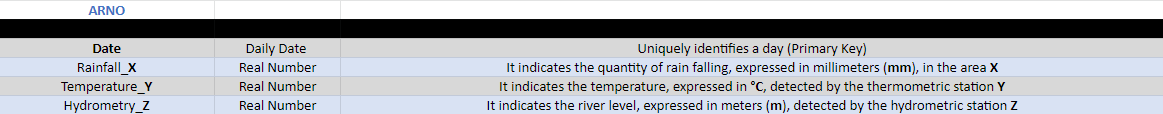

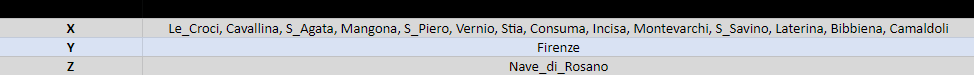

# Load data do DataFrame 

In [125]:
river_arno_csv_name = "River_Arno.csv"
df = pd.read_csv(data_path+river_arno_csv_name)

# Basic data statistics

In [126]:
df.columns.size

17

In [127]:
df.describe()

Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
count        6026.000000         6026.000000       6026.000000   
mean            3.129871            2.674743          2.670063   
std             8.025121            7.655847          7.166643   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000          0.000000   
50%             0.000000            0.000000          0.000000   
75%             1.200000            0.600000          1.200000   
max            88.400000          113.600000        120.200000   

       Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
count       6026.000000       6026.000000      4283.000000    1283.000000   
mean           3.340657          2.471225         3.416437       2.538893   
std            8.903134          6.650012         9.425358       6.502917   
min            0.000000          0.000000         0.000000       0.000000   
25%            0.000000          0.000000         0.000000       0.000000   
50%            0.000000          0.000000         0.000000       0.000000   
75%            1.400000          0.800000         1.200000       1.000000   
max          110.000000         80.600000       126.000000      63.000000   

       Rainfall_Consuma  Rainfall_Incisa  Rainfall_Montevarchi  \
count       1283.000000      4568.000000           1647.000000   
mean           3.416680         2.335026              2.056709   
std            8.938863         6.347652              6.117967   
min            0.000000         0.000000              0.000000   
25%            0.000000         0.000000              0.000000   
50%            0.000000         0.000000              0.000000   
75%            2.200000         0.800000              0.600000   
max          114.400000       102.200000             75.000000   

       Rainfall_S_Savino  Rainfall_Laterina  Rainfall_Bibbiena  \
count         1283.00000        1283.000000        2378.000000   
mean             2.42650           2.101949           2.640959   
std              7.23414           6.377879           7.161416   
min              0.00000           0.000000           0.000000   
25%              0.00000           0.000000           0.000000   
50%              0.00000           0.000000           0.000000   
75%              0.70000           0.400000           1.200000   
max            123.20000          95.600000          77.400000   

       Rainfall_Camaldoli  Temperature_Firenze  Hydrometry_Nave_di_Rosano  
count         1283.000000          6192.000000                8169.000000  
mean             3.826968            16.605386                   1.472407  
std              9.591337             7.458951                   0.616259  
min              0.000000            -2.700000                   0.000000  
25%              0.000000            10.650000                   1.100000  
50%              0.000000            16.350000                   1.300000  
75%              2.400000            22.700000                   1.690000  
max            103.600000            34.900000                   6.750000

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [129]:
df.isnull().sum()

Date                            0
Rainfall_Le_Croci            2191
Rainfall_Cavallina           2191
Rainfall_S_Agata             2191
Rainfall_Mangona             2191
Rainfall_S_Piero             2191
Rainfall_Vernio              3934
Rainfall_Stia                6934
Rainfall_Consuma             6934
Rainfall_Incisa              3649
Rainfall_Montevarchi         6570
Rainfall_S_Savino            6934
Rainfall_Laterina            6934
Rainfall_Bibbiena            5839
Rainfall_Camaldoli           6934
Temperature_Firenze          2025
Hydrometry_Nave_di_Rosano      48
dtype: int64

# Convert index to datetime

In [130]:
df.index = pd.to_datetime(df.Date)

In [131]:
df=df.drop(['Date'], axis=1)

# Features engineering

In [132]:
def feature_engineering(df):
    df["Day"] = df.index.day
    df["Month"] = df.index.month
    df["Year"] = df.index.year
    df["DayOfYear"] = df.index.dayofyear
    df["WeekOfYear"] = df.index.weekofyear

    
    return df

In [133]:
df.index.min(), df.index.max()

(Timestamp('1998-01-01 00:00:00'), Timestamp('2020-12-06 00:00:00'))

In [134]:
df_date_range = pd.date_range(start='1998-01-01', end='2020-12-06')
list_of_missing_dates = df_date_range.difference(df.index)
df_missing = pd.DataFrame(index=list_of_missing_dates, columns=df.columns)

In [135]:
print(f'df.size :',df.shape)

df.size : (8217, 16)


In [136]:
print(f'df_missing.size :',df_missing.shape)

df_missing.size : (159, 16)


In [137]:
df_with_missing = pd.concat([df, df_missing])

df_all = feature_engineering(df_with_missing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [138]:
print(f'df_with_missing.size :',df_with_missing.shape)
df_with_missing.loc['2020-12-06']

df_with_missing.size : (8376, 21)


Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
2020-12-06               19.8                15.0               8.0   

            Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  \
2020-12-06               8.0              16.0              NaN   

            Rainfall_Stia  Rainfall_Consuma  Rainfall_Incisa  \
2020-12-06            NaN               NaN              NaN   

            Rainfall_Montevarchi  ...  Rainfall_Laterina  Rainfall_Bibbiena  \
2020-12-06                   NaN  ...                NaN                NaN   

            Rainfall_Camaldoli  Temperature_Firenze  \
2020-12-06                 NaN                  NaN   

            Hydrometry_Nave_di_Rosano  Day  Month  Year  DayOfYear  WeekOfYear  
2020-12-06                       1.46    6     12  2020        341          49  

[1 rows x 21 columns]

In [139]:
df_2008 = df_all.loc[df_all['Year'].isin([2008])]
df_2008.isnull().sum()

Rainfall_Le_Croci              0
Rainfall_Cavallina             0
Rainfall_S_Agata               0
Rainfall_Mangona               0
Rainfall_S_Piero               0
Rainfall_Vernio                0
Rainfall_Stia                366
Rainfall_Consuma             366
Rainfall_Incisa                0
Rainfall_Montevarchi         179
Rainfall_S_Savino            366
Rainfall_Laterina            366
Rainfall_Bibbiena              0
Rainfall_Camaldoli           366
Temperature_Firenze            0
Hydrometry_Nave_di_Rosano      1
Day                            0
Month                          0
Year                           0
DayOfYear                      0
WeekOfYear                     0
dtype: int64

In [140]:
df_2020 = df_all.loc[df_all['Year'].isin([2020])]
df_2020.isnull().sum()

Rainfall_Le_Croci            159
Rainfall_Cavallina           159
Rainfall_S_Agata             159
Rainfall_Mangona             159
Rainfall_S_Piero             159
Rainfall_Vernio              341
Rainfall_Stia                341
Rainfall_Consuma             341
Rainfall_Incisa              341
Rainfall_Montevarchi         341
Rainfall_S_Savino            341
Rainfall_Laterina            341
Rainfall_Bibbiena            341
Rainfall_Camaldoli           341
Temperature_Firenze          341
Hydrometry_Nave_di_Rosano    160
Day                            0
Month                          0
Year                           0
DayOfYear                      0
WeekOfYear                     0
dtype: int64

In [141]:
df_all.index.max() - df_all.index.min()

Timedelta('8375 days 00:00:00')

In [142]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8376 entries, 1998-01-01 to 2020-11-30
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_Le_Croci          6026 non-null   float64
 1   Rainfall_Cavallina         6026 non-null   float64
 2   Rainfall_S_Agata           6026 non-null   float64
 3   Rainfall_Mangona           6026 non-null   float64
 4   Rainfall_S_Piero           6026 non-null   float64
 5   Rainfall_Vernio            4283 non-null   float64
 6   Rainfall_Stia              1283 non-null   float64
 7   Rainfall_Consuma           1283 non-null   float64
 8   Rainfall_Incisa            4568 non-null   float64
 9   Rainfall_Montevarchi       1647 non-null   float64
 10  Rainfall_S_Savino          1283 non-null   float64
 11  Rainfall_Laterina          1283 non-null   float64
 12  Rainfall_Bibbiena          2378 non-null   float64
 13  Rainfall_Camaldoli         128

In [143]:
df_all.isnull().sum()

Rainfall_Le_Croci            2350
Rainfall_Cavallina           2350
Rainfall_S_Agata             2350
Rainfall_Mangona             2350
Rainfall_S_Piero             2350
Rainfall_Vernio              4093
Rainfall_Stia                7093
Rainfall_Consuma             7093
Rainfall_Incisa              3808
Rainfall_Montevarchi         6729
Rainfall_S_Savino            7093
Rainfall_Laterina            7093
Rainfall_Bibbiena            5998
Rainfall_Camaldoli           7093
Temperature_Firenze          2184
Hydrometry_Nave_di_Rosano     207
Day                             0
Month                           0
Year                            0
DayOfYear                       0
WeekOfYear                      0
dtype: int64

In [144]:
df_all = df_all.sort_index()
fig = px.line(df_all, x="DayOfYear", y="Hydrometry_Nave_di_Rosano", animation_frame="Year", markers=True)
fig.update_traces(connectgaps=False)
fig.update_yaxes(range=[-0.5, 6.8])
fig.show()

In [145]:
def line_df(df, y="Hydrometry_Nave_di_Rosano"):
  fig = px.line(df, x=df.index, y=y, markers=True)
  fig.update_traces(connectgaps=False)
  fig.update_layout(hovermode="x unified")
  fig.update_xaxes(showspikes=True)
  fig.update_yaxes(showspikes=True)
  fig.show()

In [146]:
df_2008 = df_2008.sort_index()
line_df(df_2008)

In [147]:
fig = px.scatter(df_all, x="DayOfYear", y="Hydrometry_Nave_di_Rosano", animation_frame="Year")
fig.update_traces(connectgaps=False)
fig.update_yaxes(range=[-0.5, 6.8])
fig.show()

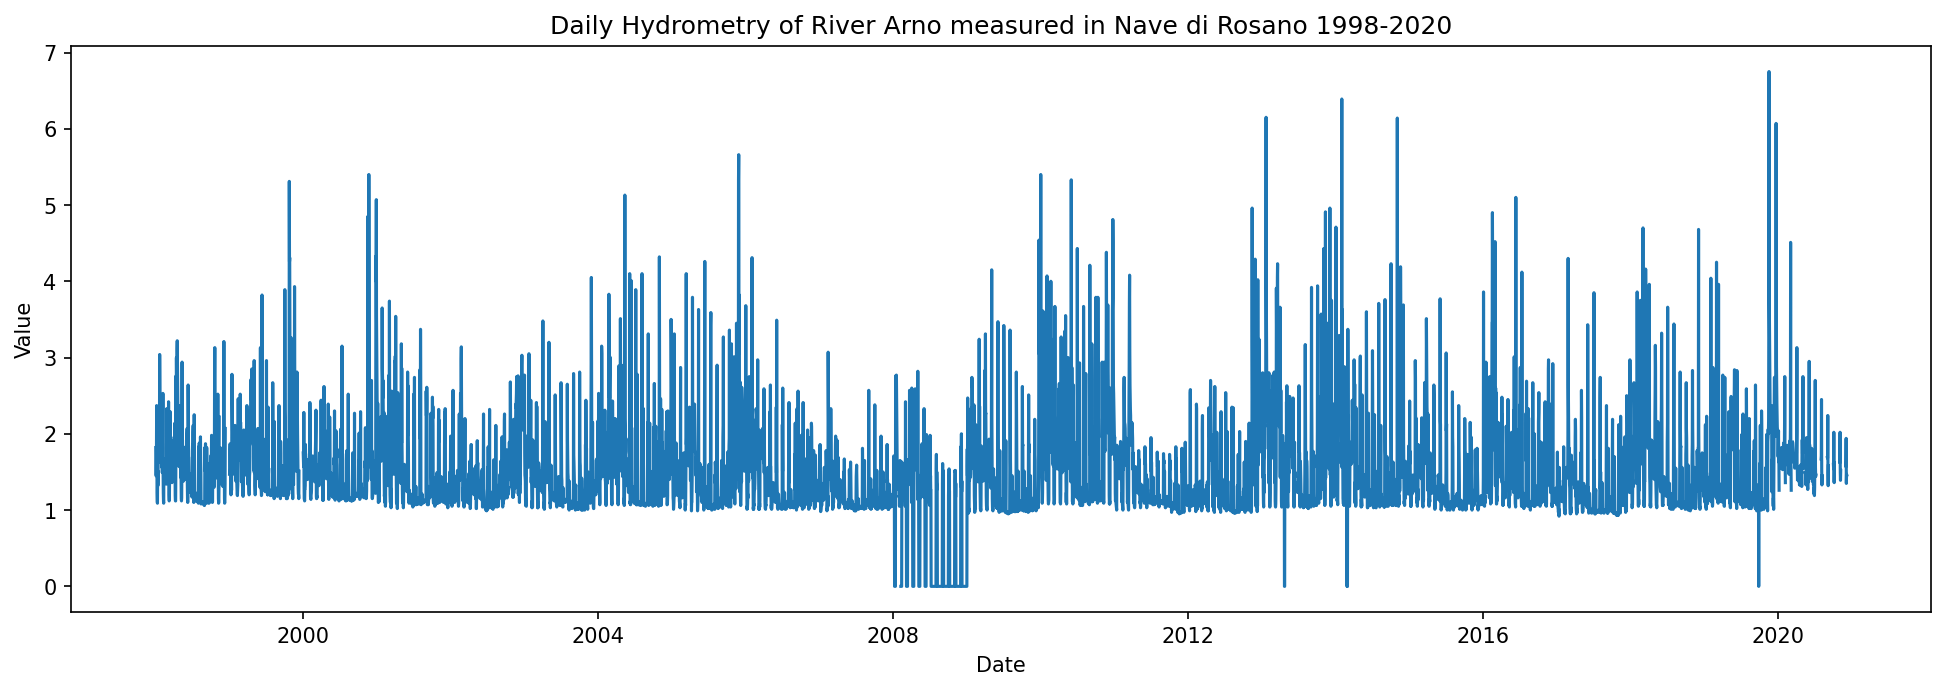

In [148]:
def plot_df(y, title="", xlabel='Date', ylabel='Value', dpi=150, **xarg):
    plt.figure(figsize=(16,5), dpi=dpi)
    x = xarg.get('x')
    if x is None:
      plt.plot(y, color='tab:blue')
    else:
      plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(y=df_all.Hydrometry_Nave_di_Rosano, title='Daily Hydrometry of River Arno measured in Nave di Rosano 1998-2020', x=df_all.index)

# Wzorce szeregów czasowych

> ### trend - długookresowy wzrost lub spadek 


> ### sezonowość - czynnkiki sezonowe takie jak rok, tydzień, dzień mają wpływ na wartości szeregu czasowego



> ### cykliczność - wahania bez stałej częstotliwości skojarzonej z okresami kalendarzowymi







Seasonal Plot


In [149]:
def boxplot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=150):
    fig = plt.figure(figsize=(16,10), dpi=dpi)
    sns.boxplot(x=x, y=y, data=df)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

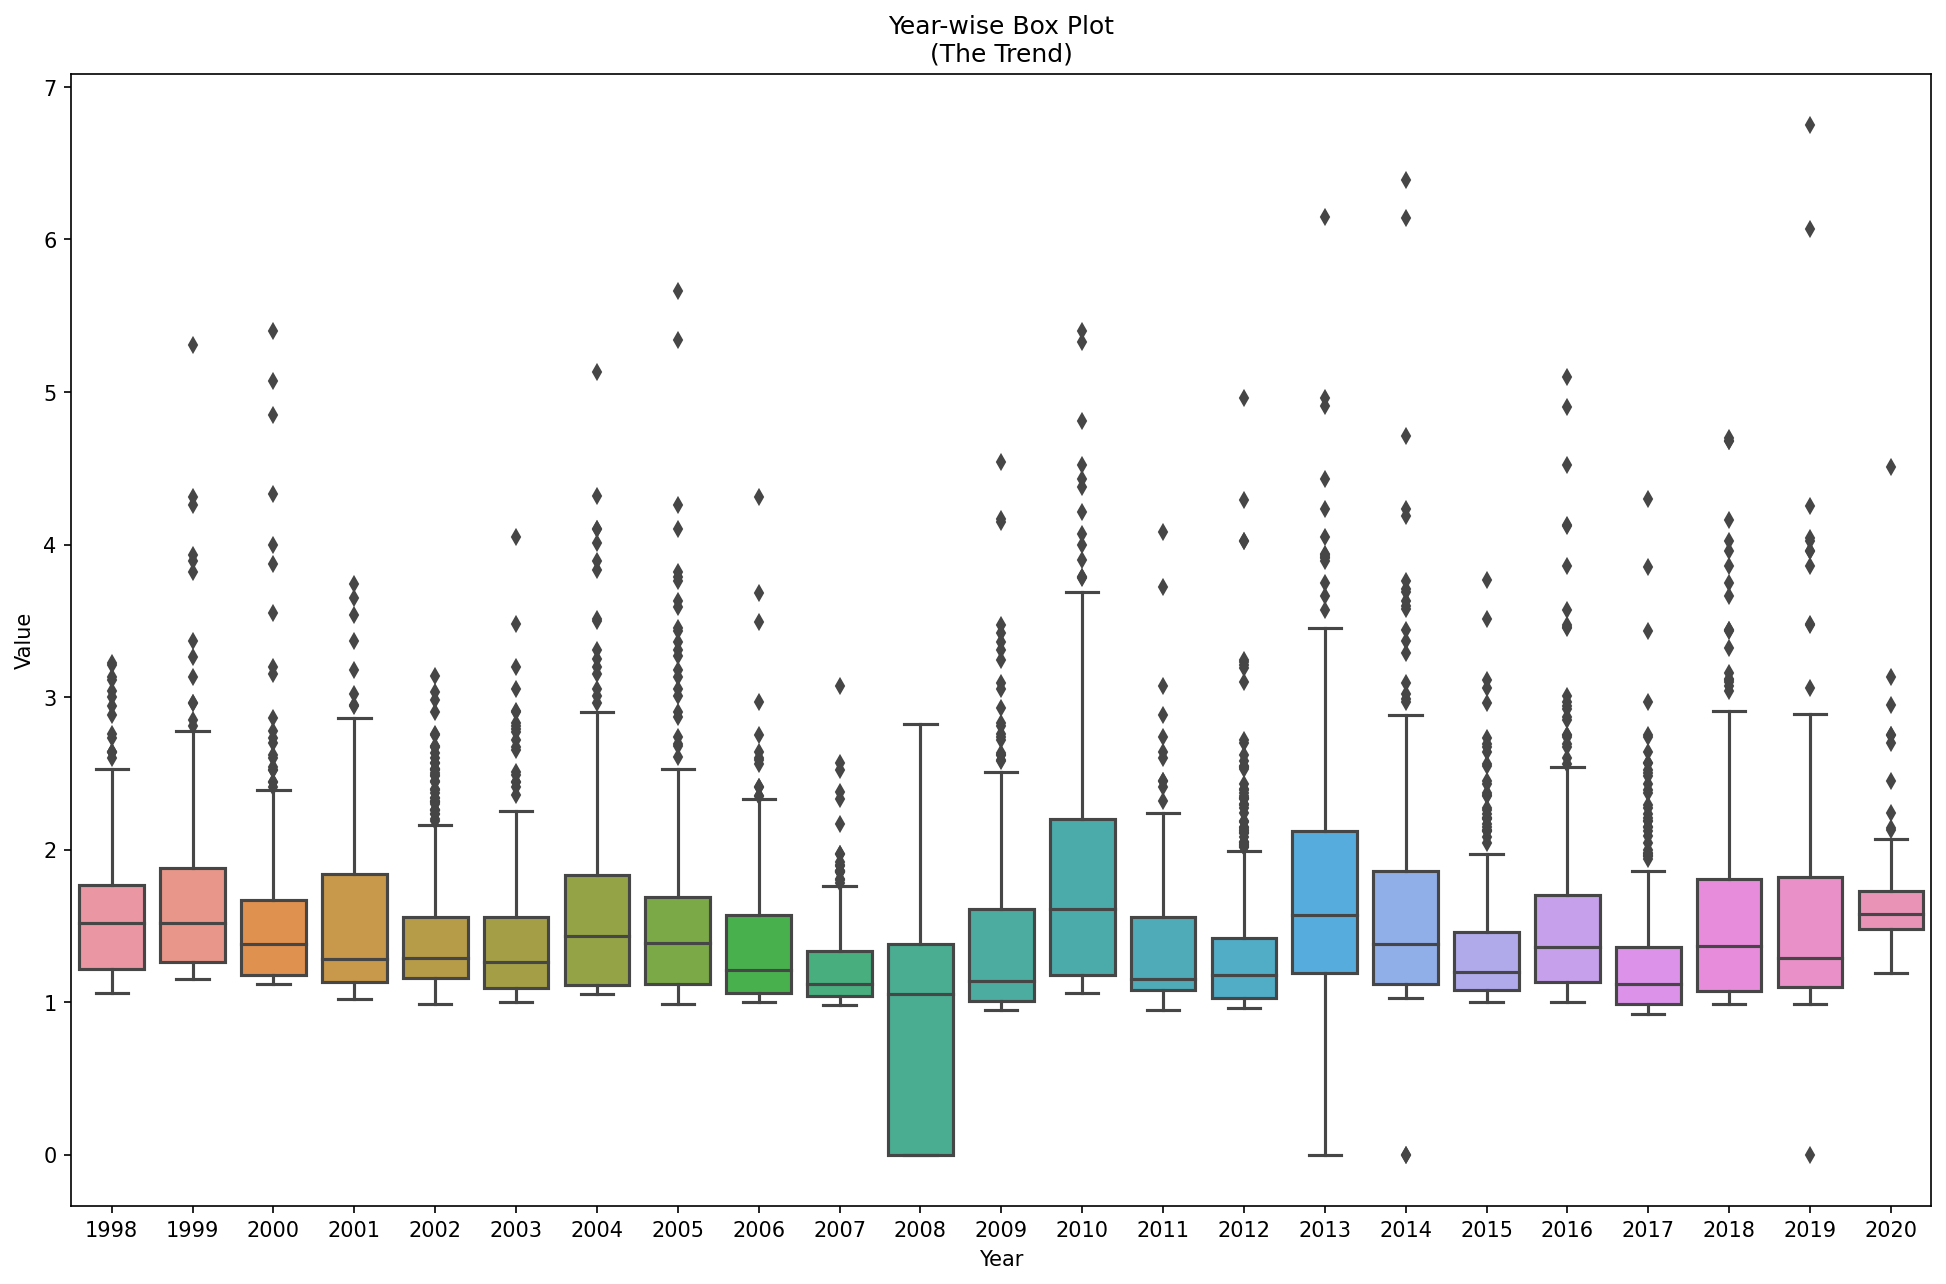

In [150]:
boxplot_df(df_all, 'Year', 'Hydrometry_Nave_di_Rosano', 'Year-wise Box Plot\n(The Trend)', 'Year')

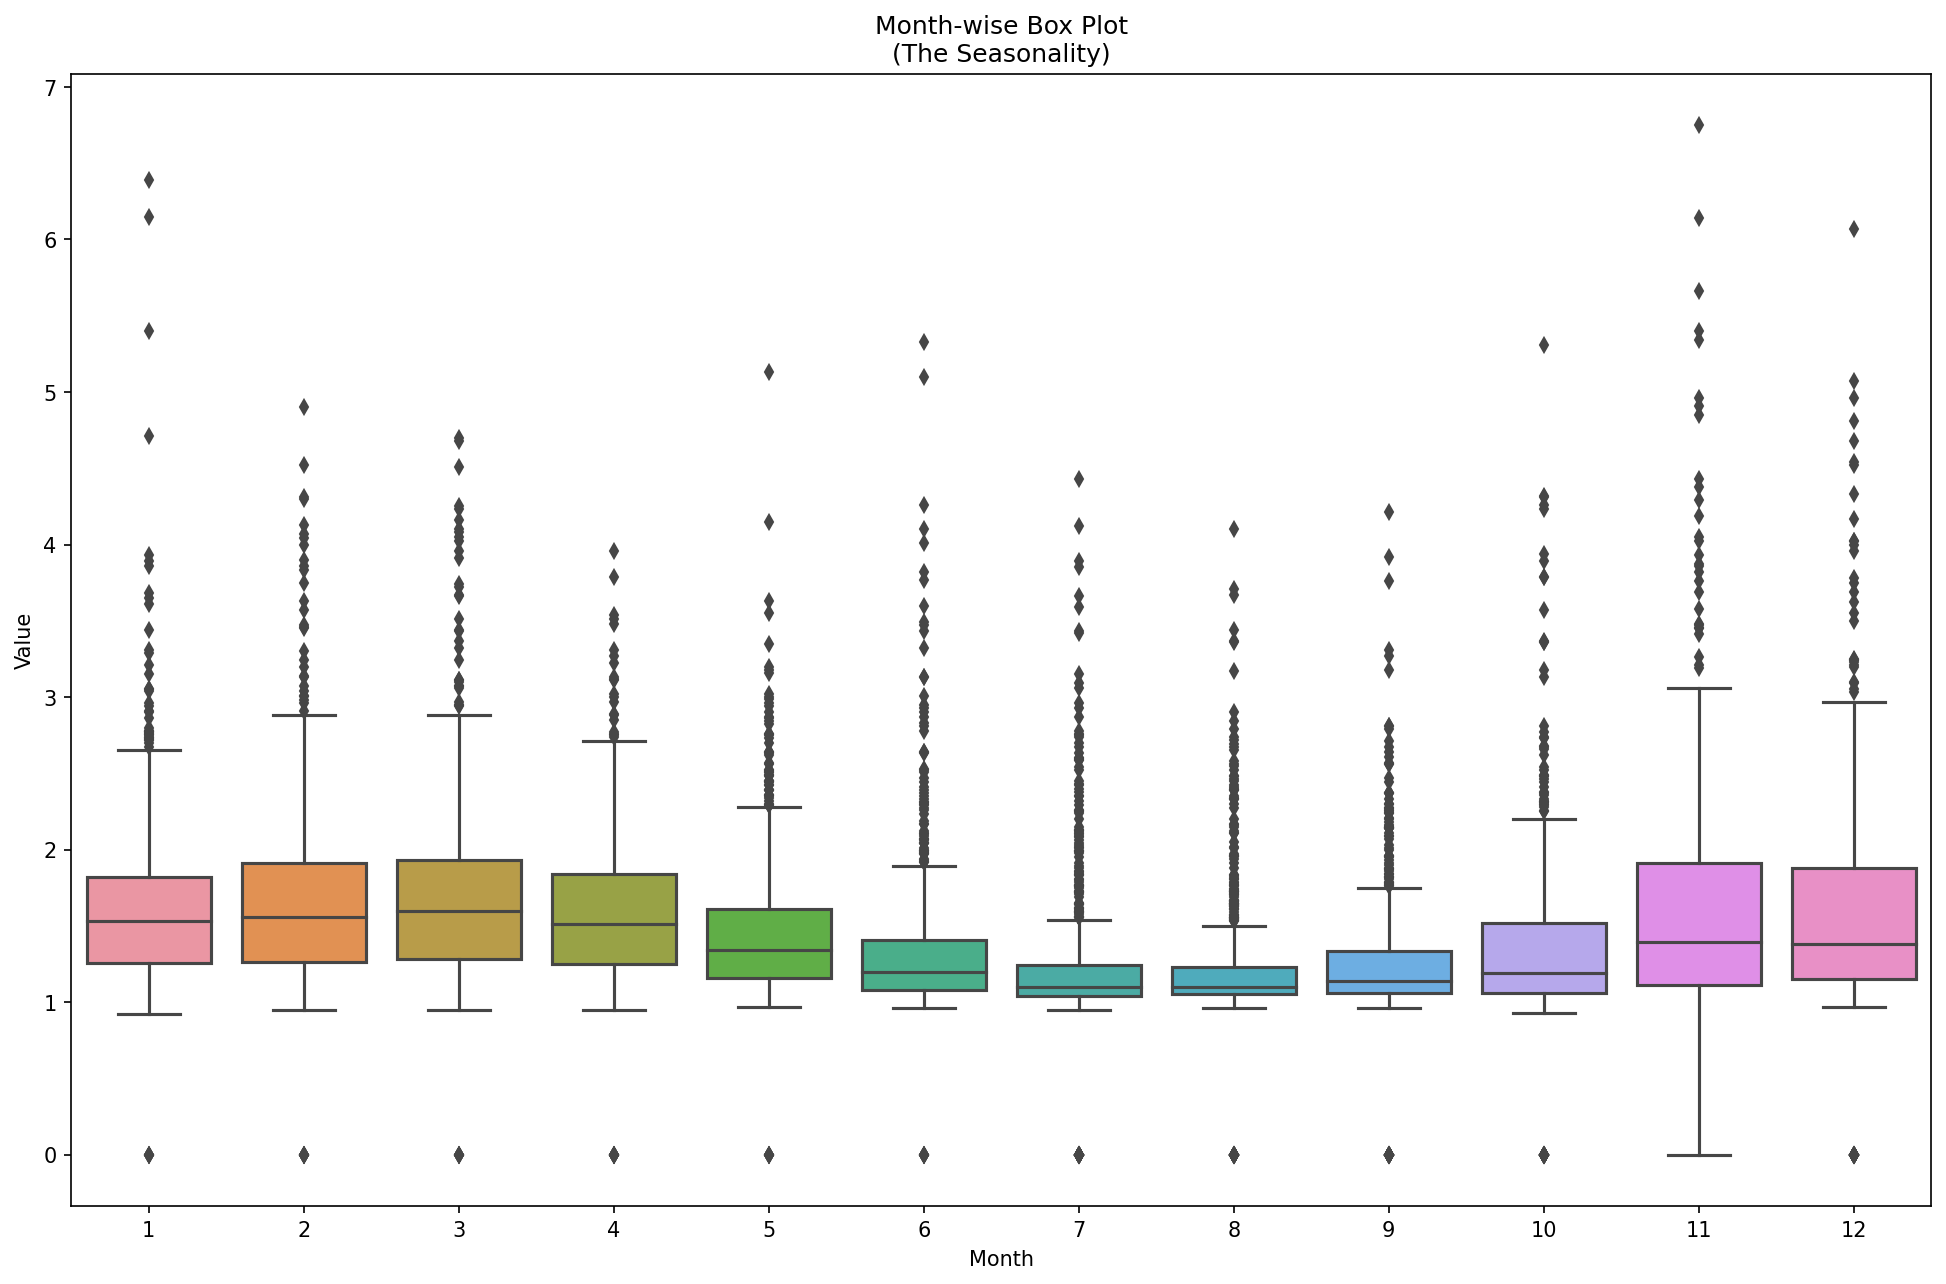

In [151]:
boxplot_df(df_all, 'Month', 'Hydrometry_Nave_di_Rosano', 'Month-wise Box Plot\n(The Seasonality)', 'Month')

https://www.machinelearningplus.com/time-series/time-series-analysis-python/


6. Additive and multiplicative time series

In [152]:
def decompose_time_series(time_series, model='', dpi=150, **periodarg):
  period = periodarg.get('period')
  if period is None:
    decomposition = seasonal_decompose(time_series, model=model, extrapolate_trend='freq')
  else:
    decomposition = seasonal_decompose(time_series, model=model, period=period, extrapolate_trend='freq')
  fig = decomposition.plot()
  fig.set_size_inches((16, 9))
  fig.set_dpi(dpi)
  # Tight layout to realign things
  fig.tight_layout()
  plt.show()
  return decomposition

# Time Series Hydrometry Decomposition 

In [153]:
df_hydrometry_time_series = df_all['Hydrometry_Nave_di_Rosano']

# Filling missing values with the use of Last Observation Carried Forward

df_hydrometry_time_series= df_hydrometry_time_series.ffill()
df_hydrometry_time_series.isnull().sum()

0

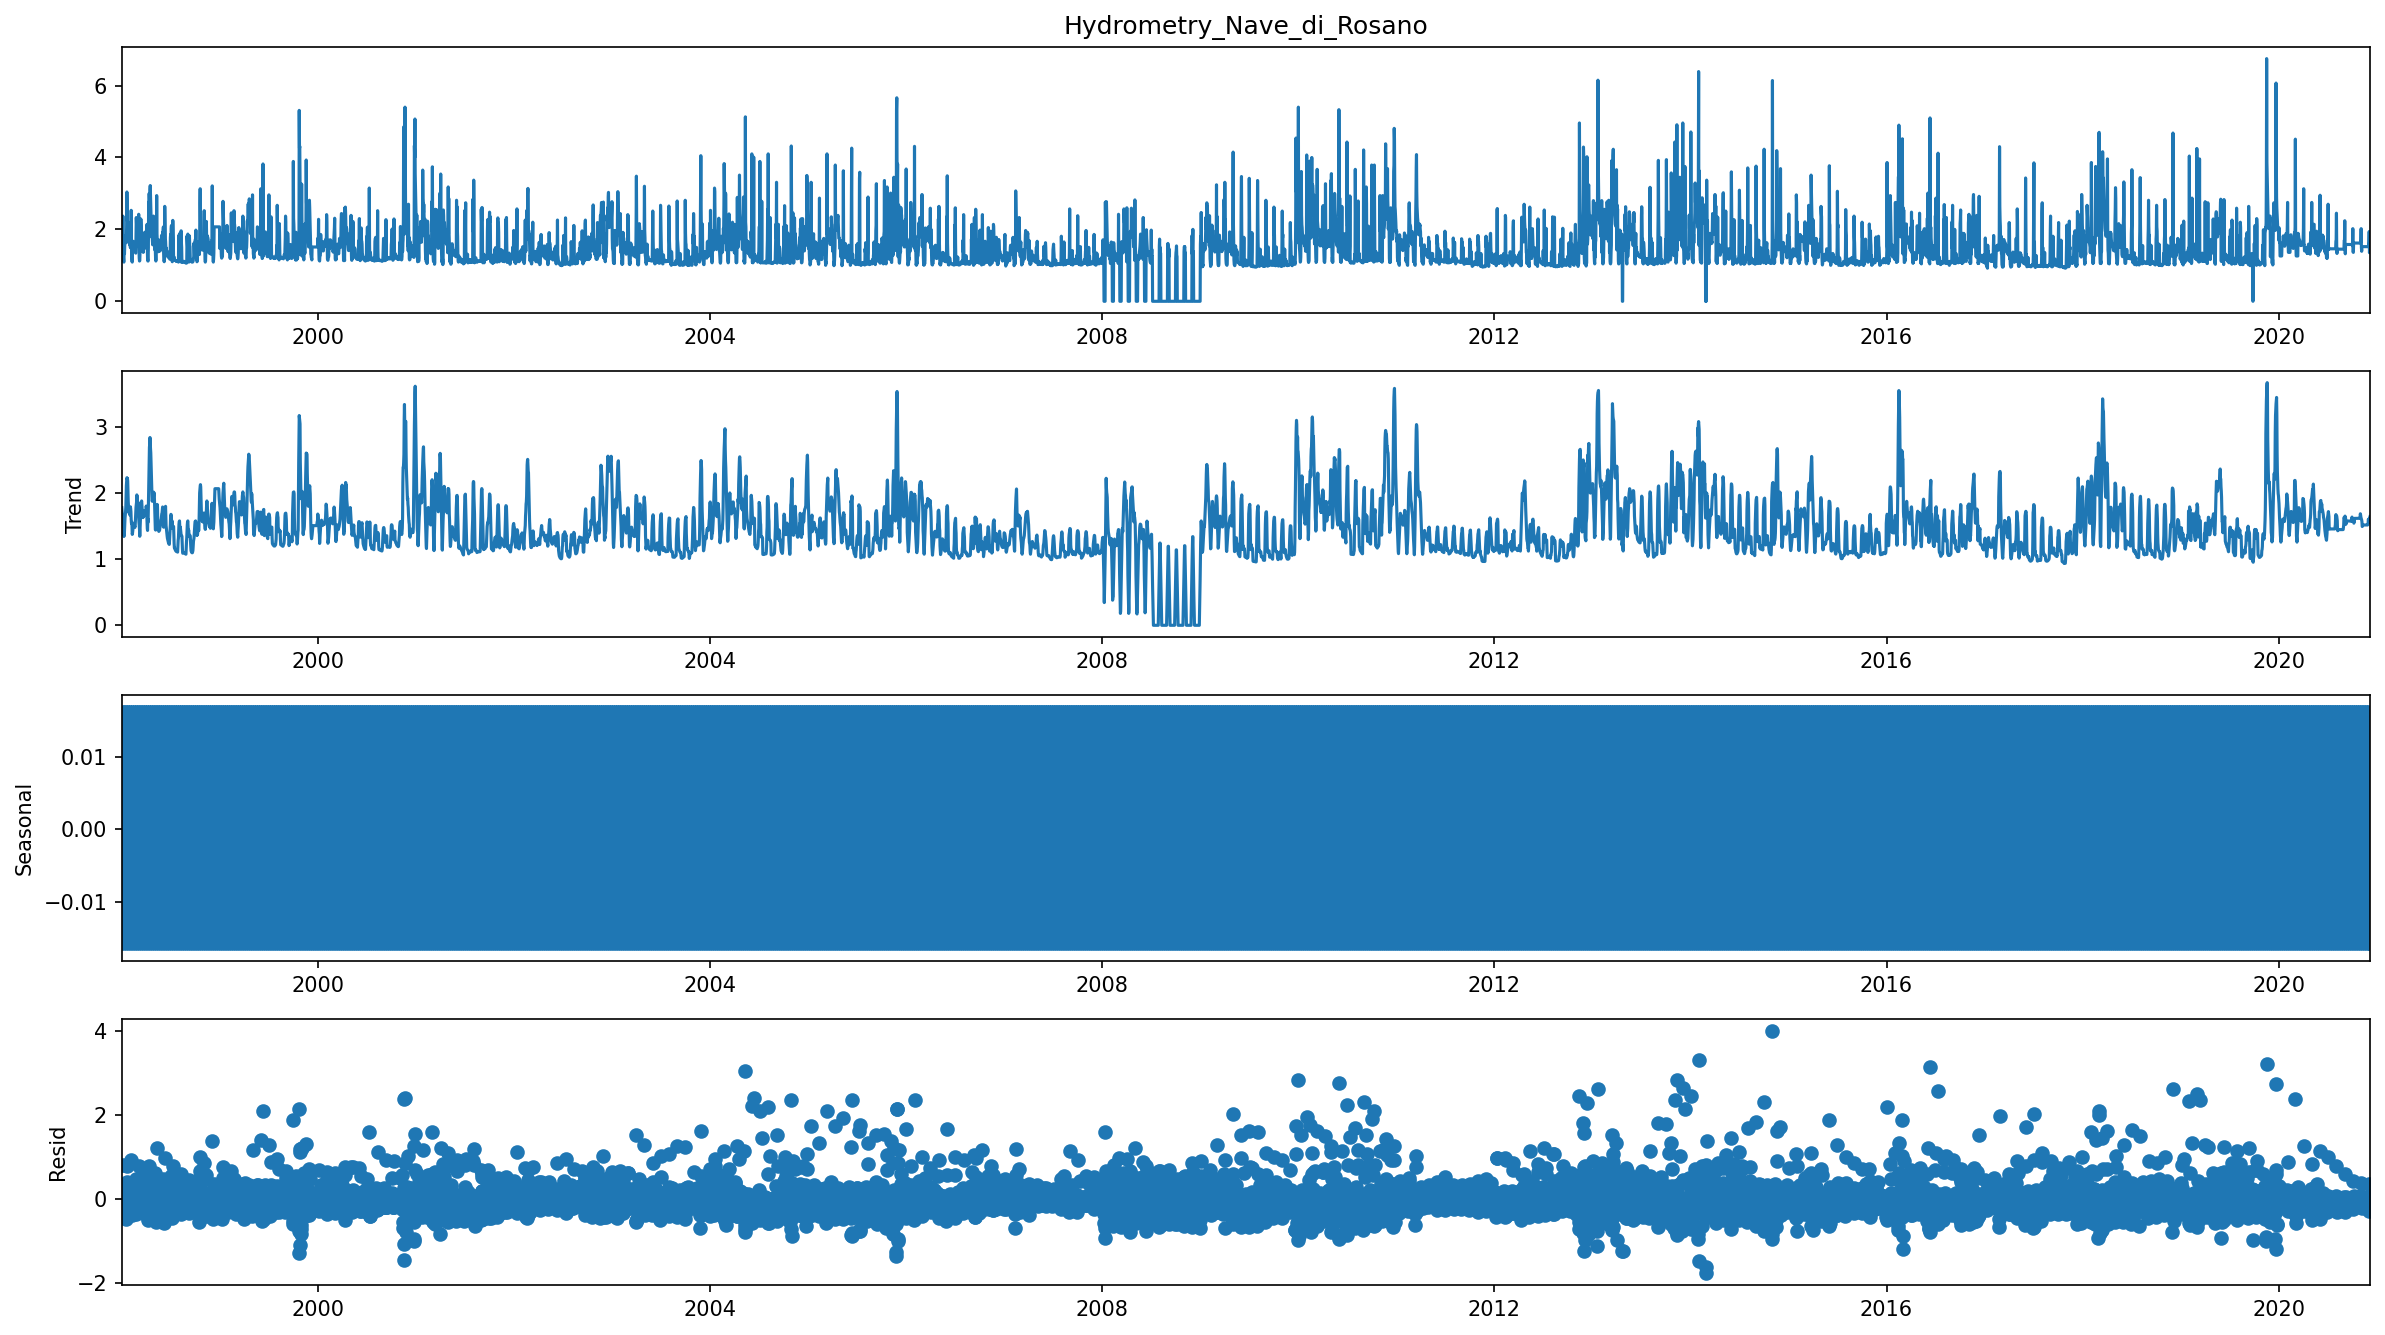

In [154]:
# Multiplicative Decomposition (commented due to existed values equals zero which can not exist in multiplicative decomposition)
# multiply_decomp = decompose_time_series(df_hydrometry_time_series,'multiplicative')

# Additive Decomposition
add_decomp = decompose_time_series(df_hydrometry_time_series,'additive')

# Time Series Hydrometry Aggregated by Week Decomposition

In [155]:
df_without_index = df_all.reset_index(level=[0])
df_without_index

index  Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0    1998-01-01                NaN                 NaN               NaN   
1    1998-01-02                NaN                 NaN               NaN   
2    1998-01-03                NaN                 NaN               NaN   
3    1998-01-04                NaN                 NaN               NaN   
4    1998-01-05                NaN                 NaN               NaN   
...         ...                ...                 ...               ...   
8371 2020-12-02                1.0                 1.4               3.0   
8372 2020-12-03                0.0                 0.0               0.2   
8373 2020-12-04                0.2                 0.2               0.0   
8374 2020-12-05                0.0                 0.0               0.0   
8375 2020-12-06               19.8                15.0               8.0   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
0                  NaN               NaN              NaN            NaN   
1                  NaN               NaN              NaN            NaN   
2                  NaN               NaN              NaN            NaN   
3                  NaN               NaN              NaN            NaN   
4                  NaN               NaN              NaN            NaN   
...                ...               ...              ...            ...   
8371               7.6               1.4              NaN            NaN   
8372               1.0               0.2              NaN            NaN   
8373               0.0               0.0              NaN            NaN   
8374               0.0               0.2              NaN            NaN   
8375               8.0              16.0              NaN            NaN   

      Rainfall_Consuma  Rainfall_Incisa  ...  Rainfall_Laterina  \
0                  NaN              NaN  ...                NaN   
1                  NaN              NaN  ...                NaN   
2                  NaN              NaN  ...                NaN   
3                  NaN              NaN  ...                NaN   
4                  NaN              NaN  ...                NaN   
...                ...              ...  ...                ...   
8371               NaN              NaN  ...                NaN   
8372               NaN              NaN  ...                NaN   
8373               NaN              NaN  ...                NaN   
8374               NaN              NaN  ...                NaN   
8375               NaN              NaN  ...                NaN   

      Rainfall_Bibbiena  Rainfall_Camaldoli  Temperature_Firenze  \
0                   NaN                 NaN                  NaN   
1                   NaN                 NaN                  NaN   
2                   NaN                 NaN                  NaN   
3                   NaN                 NaN                  NaN   
4                   NaN                 NaN                  NaN   
...                 ...                 ...                  ...   
8371                NaN                 NaN                  NaN   
8372                NaN                 NaN                  NaN   
8373                NaN                 NaN                  NaN   
8374                NaN                 NaN                  NaN   
8375                NaN                 NaN                  NaN   

      Hydrometry_Nave_di_Rosano  Day  Month  Year  DayOfYear  WeekOfYear  
0                          1.82    1      1  1998          1           1  
1                          1.45    2      1  1998          2           1  
2                          1.45    3      1  1998          3           1  
3                          1.70    4      1  1998          4           1  
4                          2.37    5      1  1998          5           2  
...                         ...  ...    ...   ...        ...         ...  
8371                       1.65    2 

In [156]:
df_without_index['WeekDate'] = df_without_index.apply(lambda column: column['index'] - dt.timedelta(days=column['index'].weekday()), axis=1)
df_without_index = df_without_index[['Hydrometry_Nave_di_Rosano','WeekDate']]

df_group_by_week_hydrometry = df_without_index.groupby(['WeekDate']).mean()
df_group_by_week_hydrometry = df_group_by_week_hydrometry.ffill()
df_group_by_week_hydrometry

Hydrometry_Nave_di_Rosano
WeekDate                             
1997-12-29                   1.605000
1998-01-05                   1.462857
1998-01-12                   1.714286
1998-01-19                   2.227143
1998-01-26                   1.738571
...                               ...
2020-11-02                   1.624000
2020-11-09                   1.624000
2020-11-16                   1.624000
2020-11-23                   1.624000
2020-11-30                   1.575000

[1197 rows x 1 columns]

In [157]:
print(statsmodels.__version__)

0.13.2


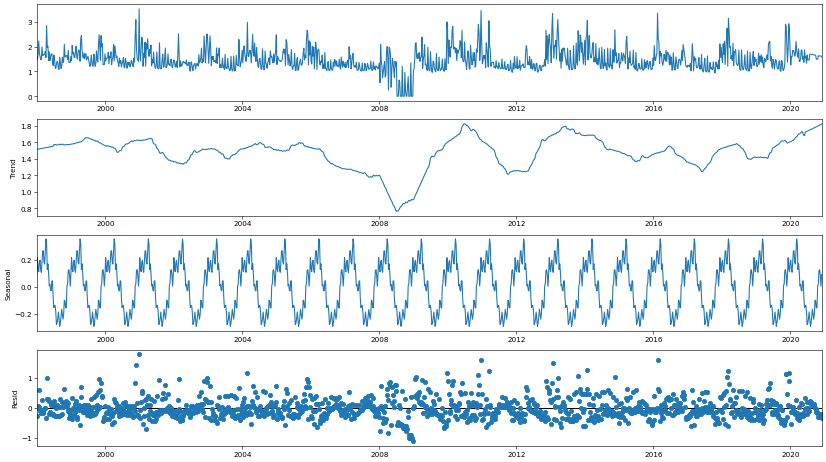

In [158]:
# Multiplicative Decomposition (commented due to existed values equals zero which can not exist in multiplicative decomposition)
# multiply_decomp = decompose_time_series(df_group_by_week_hydrometry,'multiplicative')

# Additive Decomposition
add_decomp = decompose_time_series(df_group_by_week_hydrometry,'additive',52)

# Time Series Hydrometry in 2014 Decomposition 

In [159]:
df_2014 = df_all.loc[df_all['Year'].isin([2014])]

df_2014 = df_2014['Hydrometry_Nave_di_Rosano']

# Filling missing values with the use of Last Observation Carried Forward

df_2014 = df_2014.ffill()
df_2014.isnull().sum()

0

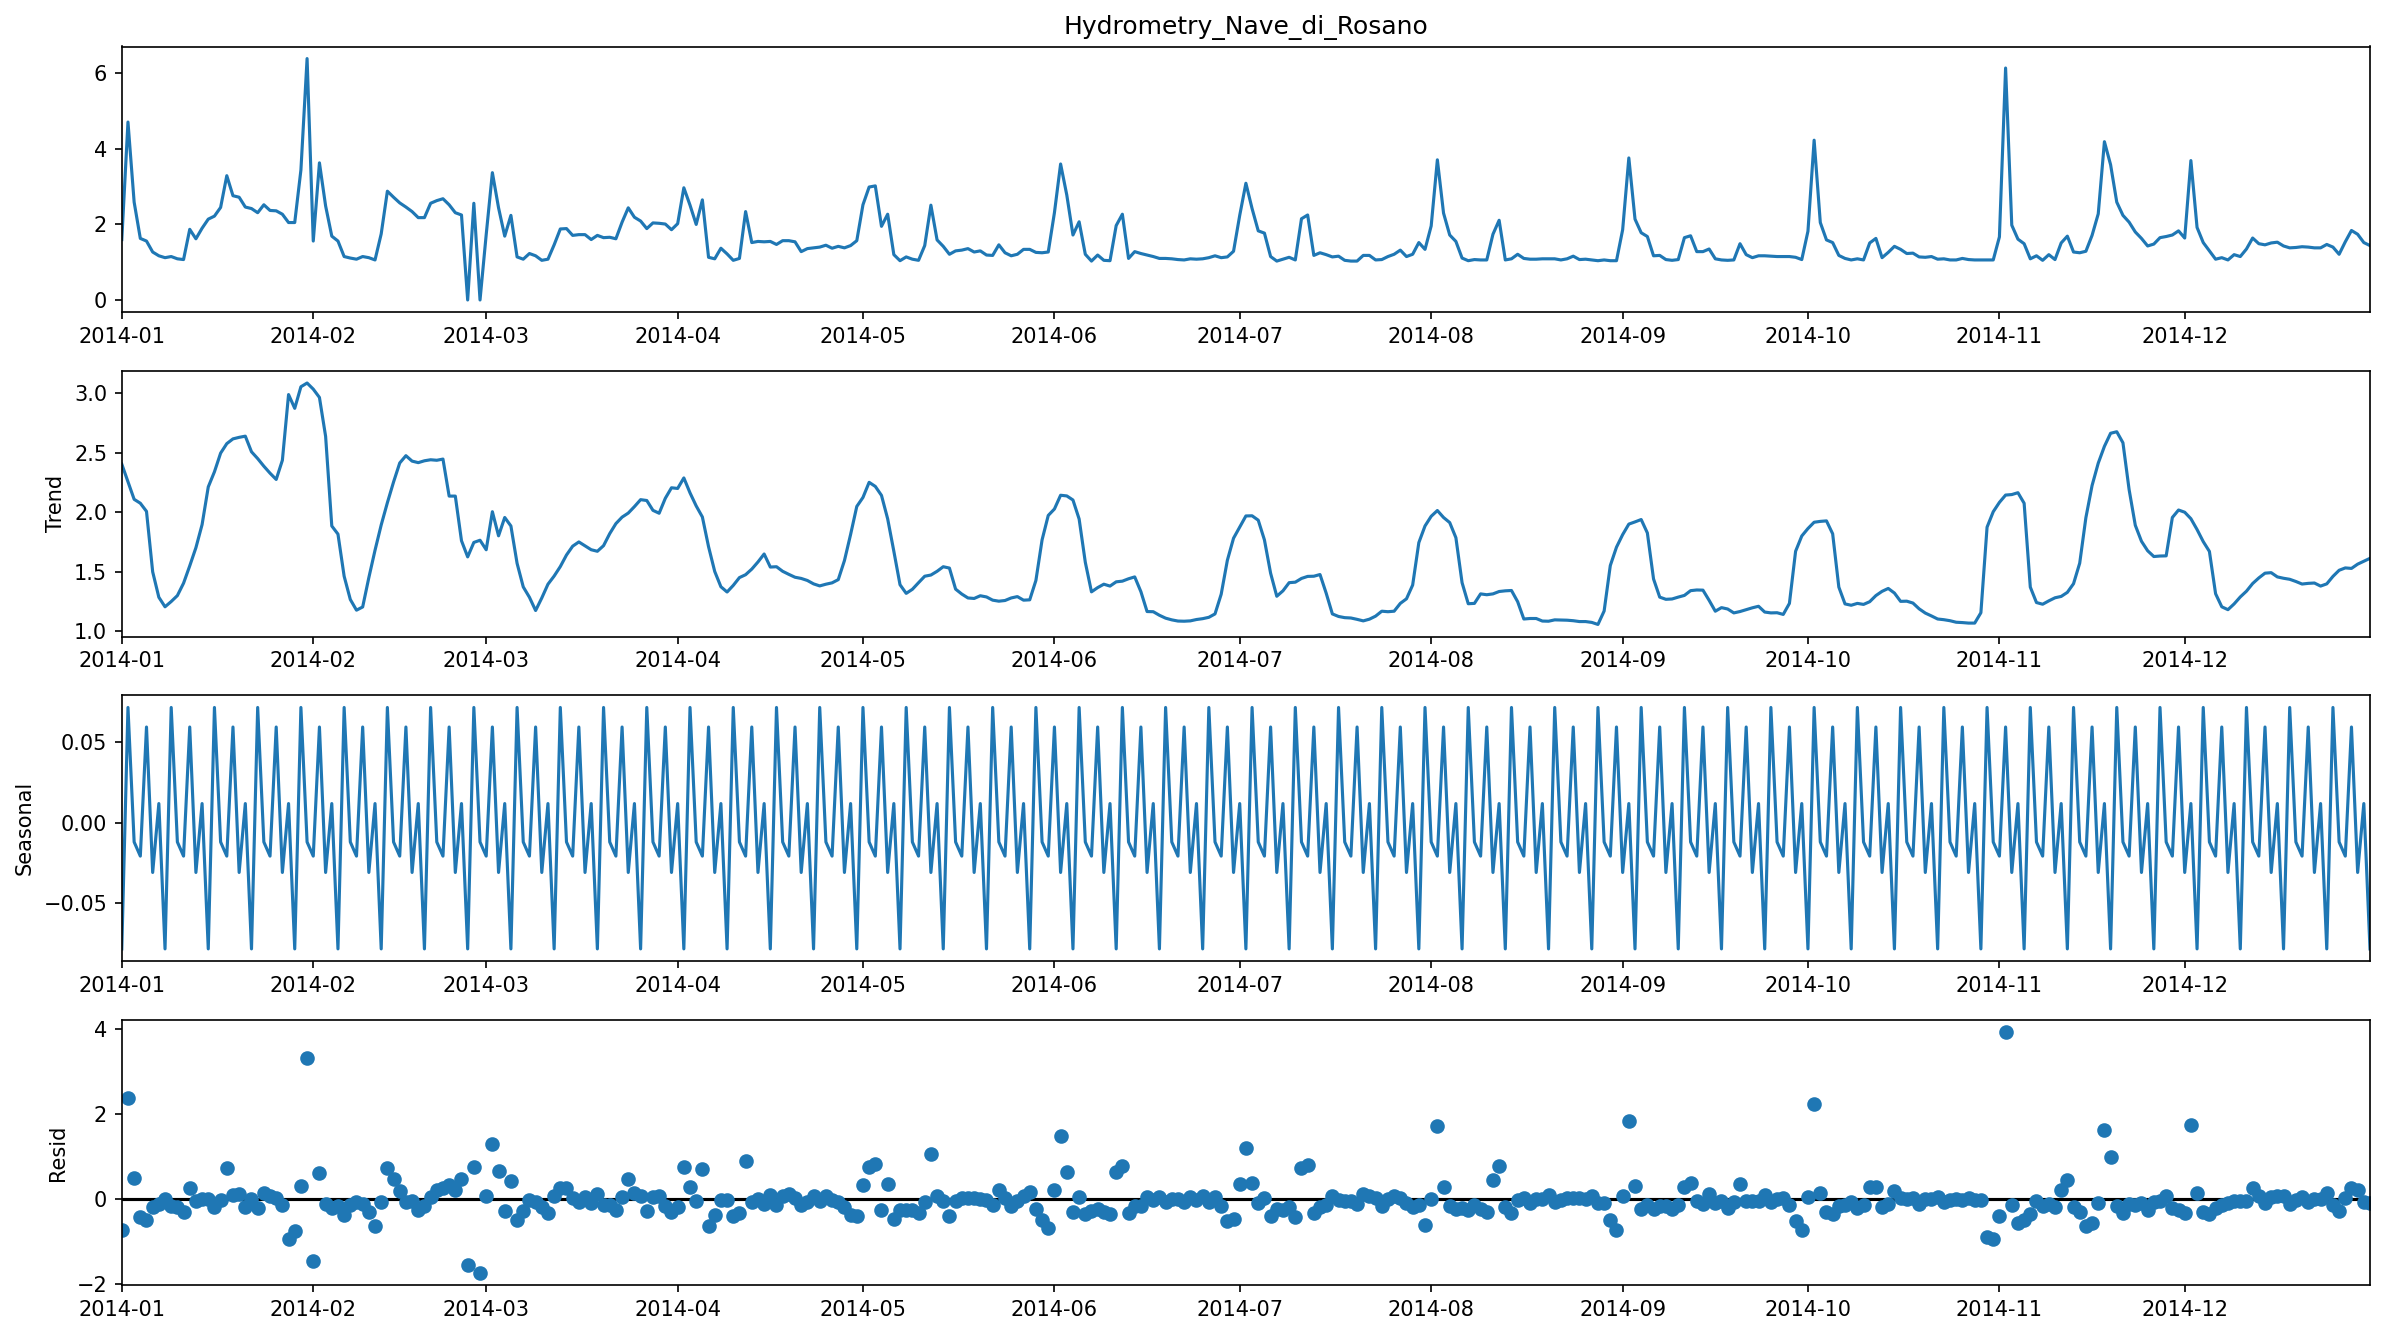

In [160]:
# Additive Decomposition
add_decomp = decompose_time_series(df_2014,'additive')

# Stationary and Non-stationary Time Series


Szereg stacjonarny to taki, w którym wartości szeregu nie są funkcją czasu. Miary statystyczne takie jak średnia, wariancja i autokorelacja są stałe w czasie. Szereg czasowy, w którym obserwowane są trendy lub sezonowość nie jest stacjonarny.


In [161]:
df_all_filled = pd.DataFrame(df_all['Hydrometry_Nave_di_Rosano'].ffill())


In [162]:
# ADF Test
# H0 - the time series possesses a unit root and is non-stationary
result = adfuller(df_all_filled['Hydrometry_Nave_di_Rosano'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.74004221743329
p-value: 3.1356384455892985e-09
Critial Values:
   1%, -3.4311340480795014
Critial Values:
   5%, -2.861886495033747
Critial Values:
   10%, -2.5669544344587605


p-value in ADH test is greater than the significance level (0.05) -> the null hypothesis is rejected

In [163]:
# KPSS Test
result = kpss(df_all_filled['Hydrometry_Nave_di_Rosano'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.362530
p-value: 0.093306
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


# Detrend a hydrometry time series

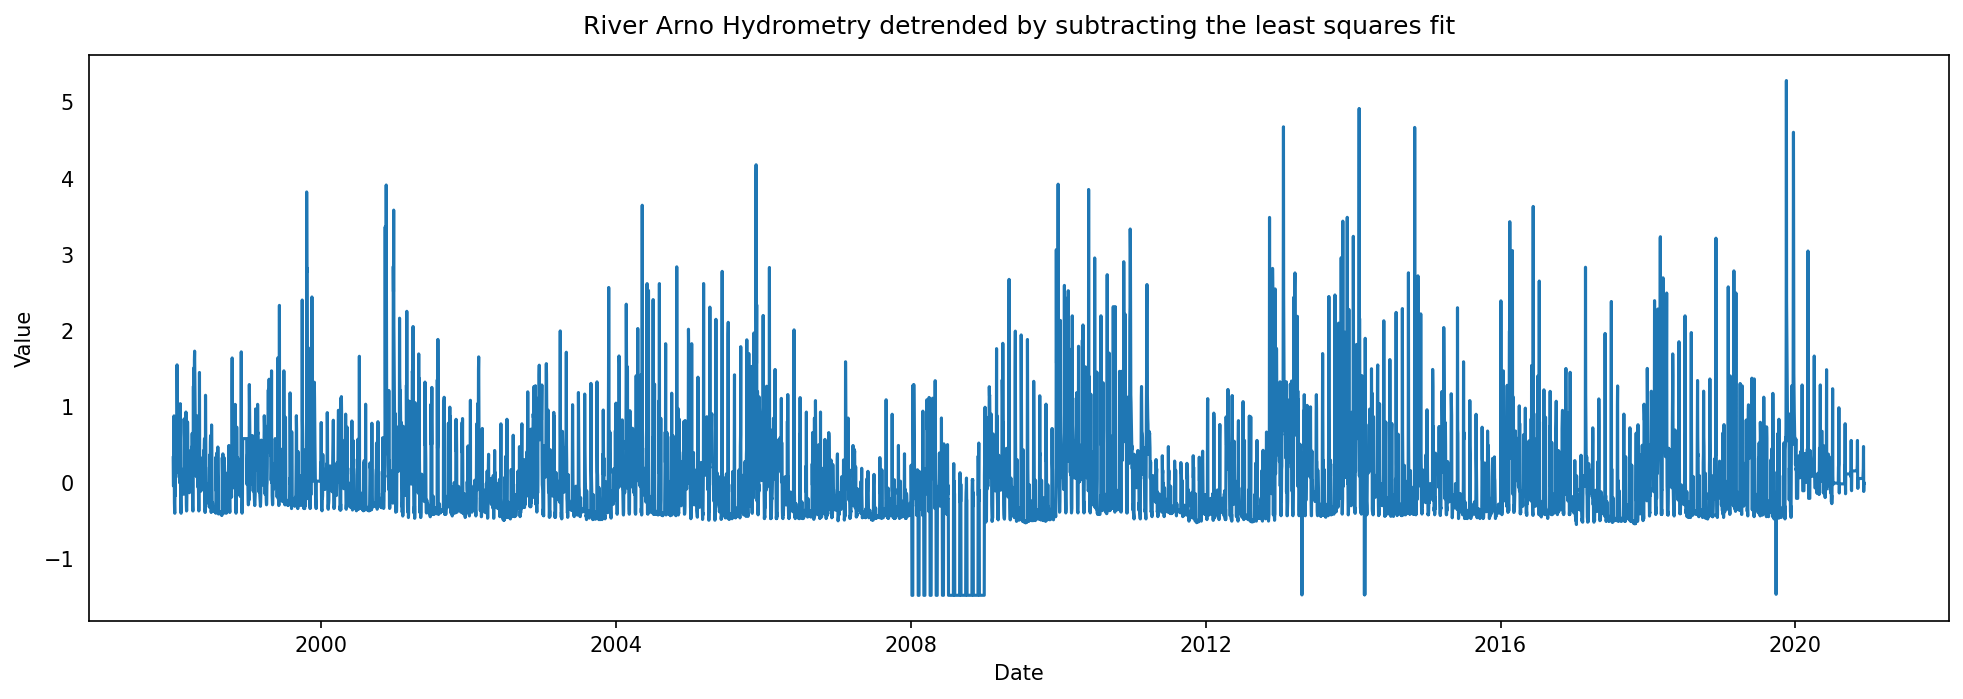

In [189]:
detrended = signal.detrend(df_all_filled['Hydrometry_Nave_di_Rosano'])
plot_df(detrended, 'River Arno Hydrometry detrended by subtracting the least squares fit', x=df_all_filled.index)

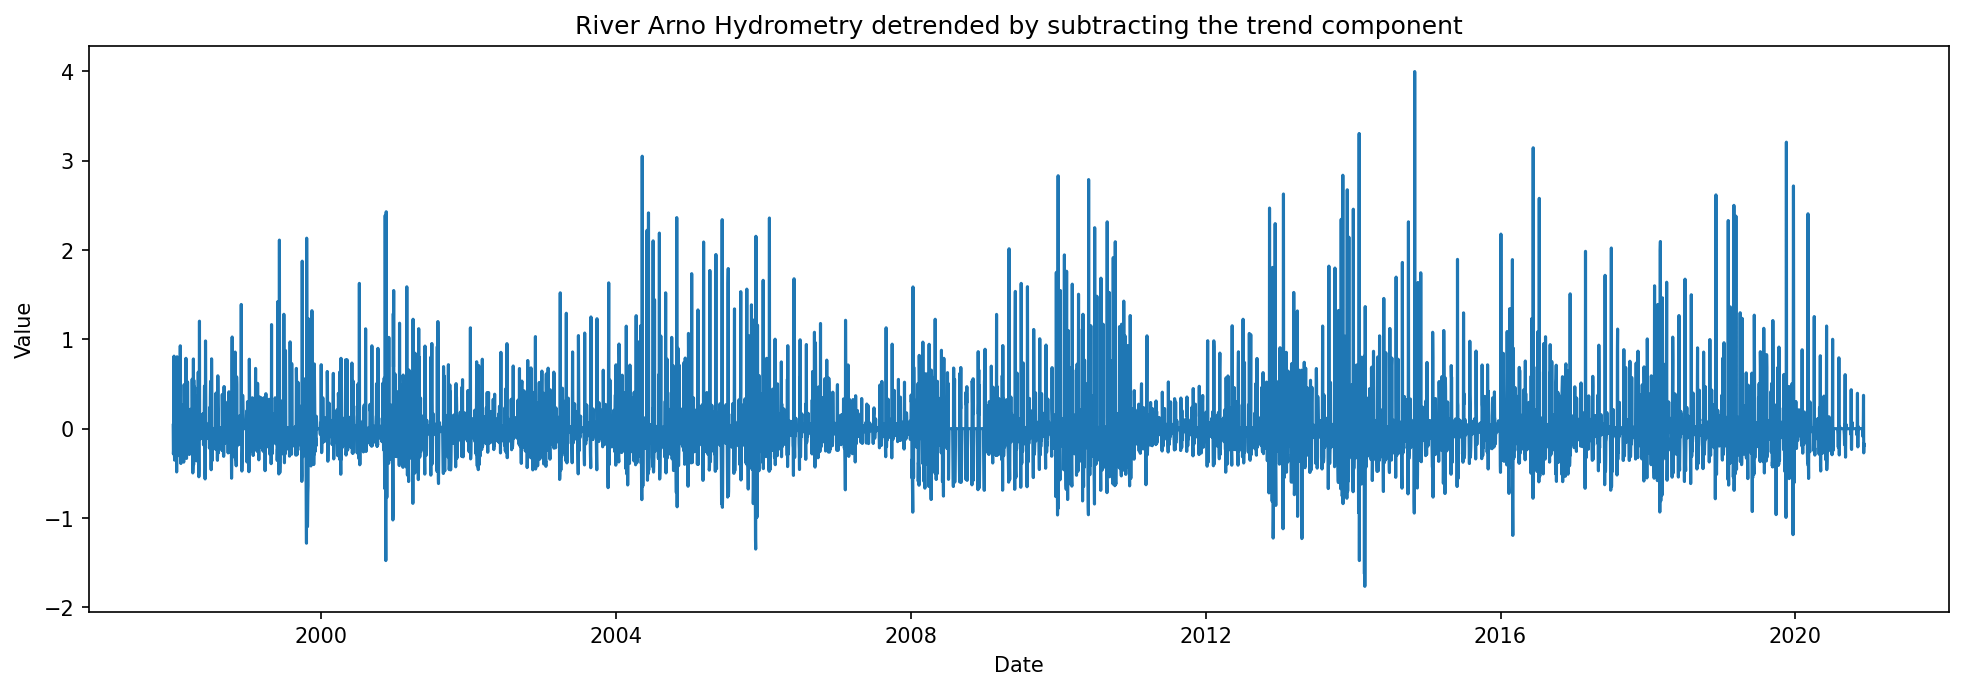

In [165]:
# Using statmodels: Subtracting the Trend Component.

# Additive Decomposition
add_decomp = seasonal_decompose(df_all_filled, model='additive', extrapolate_trend='freq')

detrended = df_all_filled['Hydrometry_Nave_di_Rosano'] - add_decomp.trend
plot_df(detrended, 'River Arno Hydrometry detrended by subtracting the trend component', x=df_all_filled.index)

# River Arno Hydrometry by week detrended by subtracting the least squares fit

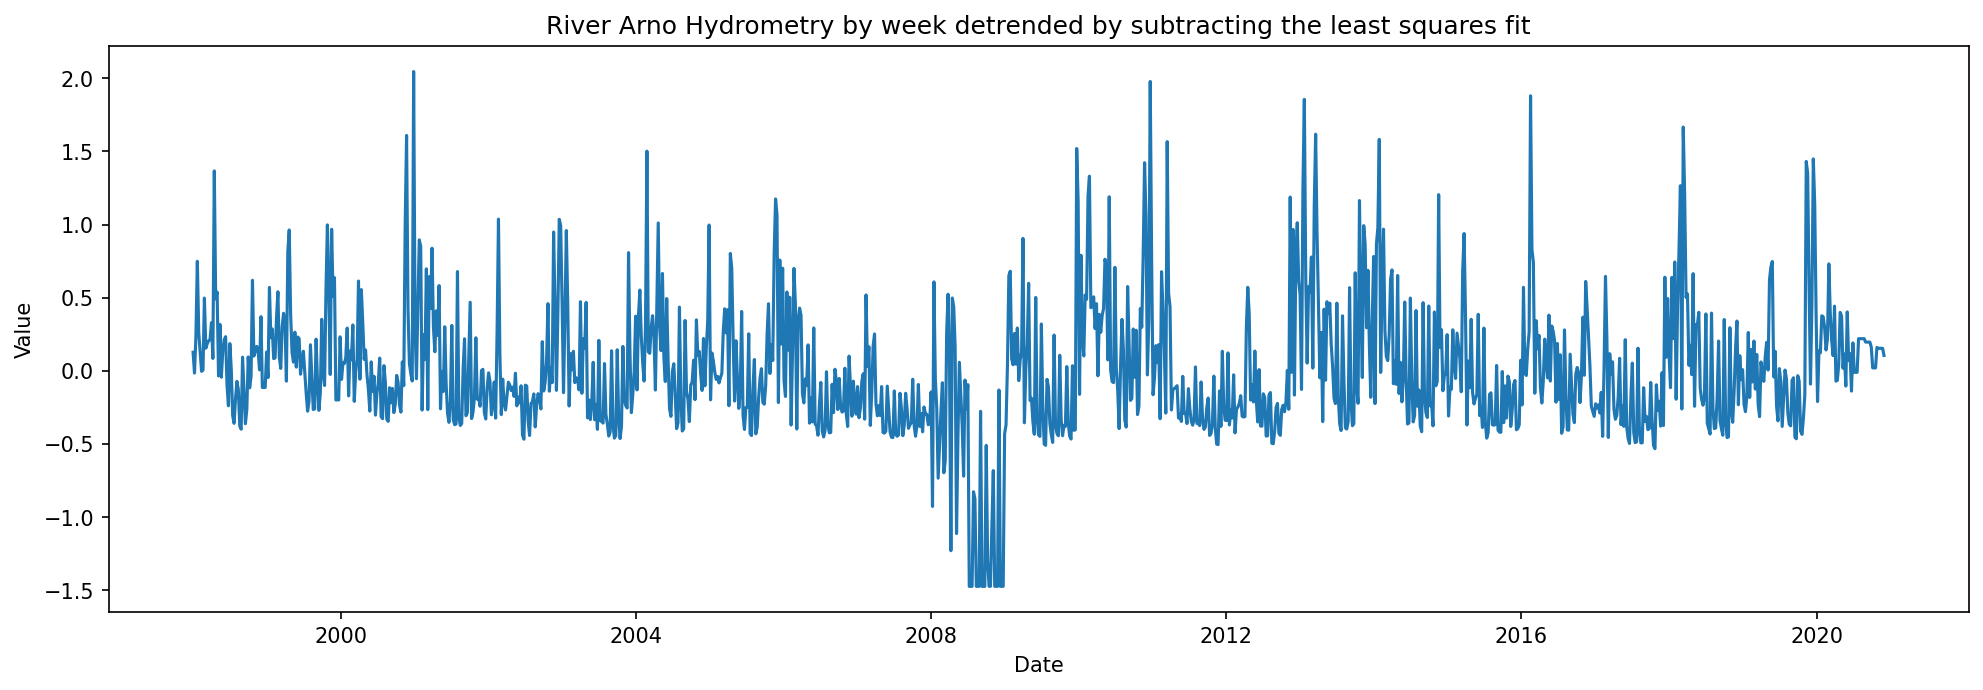

In [166]:
detrended = signal.detrend(df_group_by_week_hydrometry['Hydrometry_Nave_di_Rosano'])
plot_df(detrended, 'River Arno Hydrometry by week detrended by subtracting the least squares fit', x=df_group_by_week_hydrometry.index,)

# River Arno Hydrometry by week detrended by subtracting the trend component

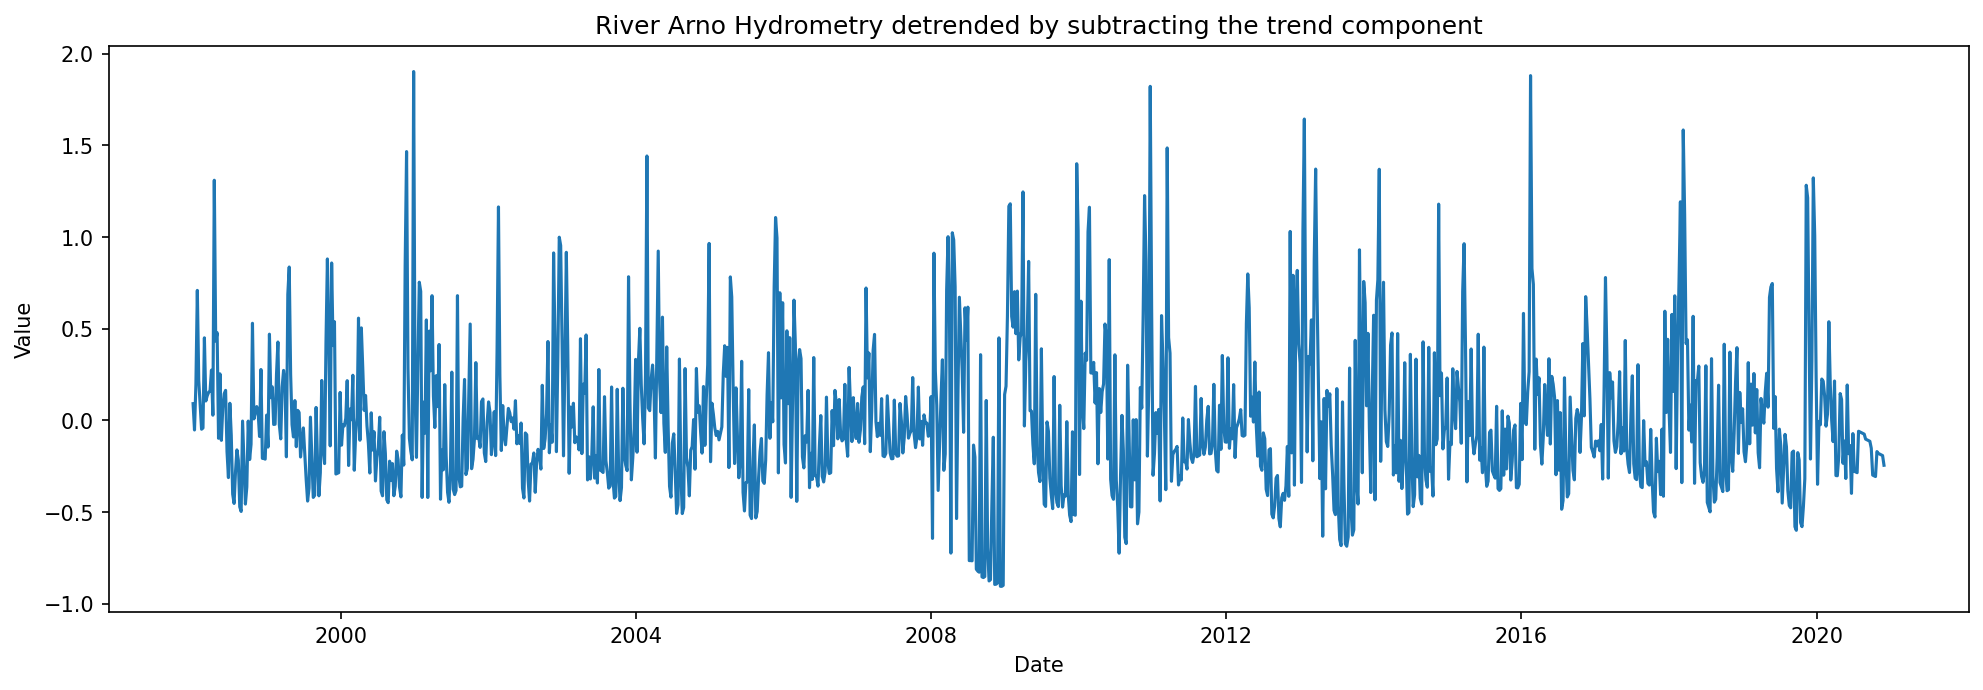

In [167]:
# Using statmodels: Subtracting the Trend Component.

# Additive Decomposition
add_decomp = seasonal_decompose(df_group_by_week_hydrometry, model='additive', extrapolate_trend='freq')
trend = add_decomp.trend.to_frame()
df_week_hydrometry_trend = pd.concat([df_group_by_week_hydrometry, trend], axis=1, join='inner')
df_week_hydrometry_trend['detrended'] = df_week_hydrometry_trend['Hydrometry_Nave_di_Rosano'] - df_week_hydrometry_trend['trend']

plot_df(df_week_hydrometry_trend['detrended'], 'River Arno Hydrometry detrended by subtracting the trend component', x = df_week_hydrometry_trend.index)

# Deseasonalize a time series with differencing 


Differencing (różnicowanie) - subtract the previous value from the current value

Differencing time series -> makes a series stationary

https://machinelearningmastery.com/time-series-seasonality-with-python/#:~:text=The%20model%20of%20seasonality%20can,referred%20to%20as%20non%2Dstationary.


In [168]:
def difference_time_series(X, days_in_year):
	diff = list()
	for i in range(days_in_year, len(X)):
		value = X[i] - X[i - days_in_year]
		diff.append(value)
	return diff

In [169]:
X = df_all_filled['Hydrometry_Nave_di_Rosano']
days_in_year = 365
diff = difference_time_series(X, days_in_year)

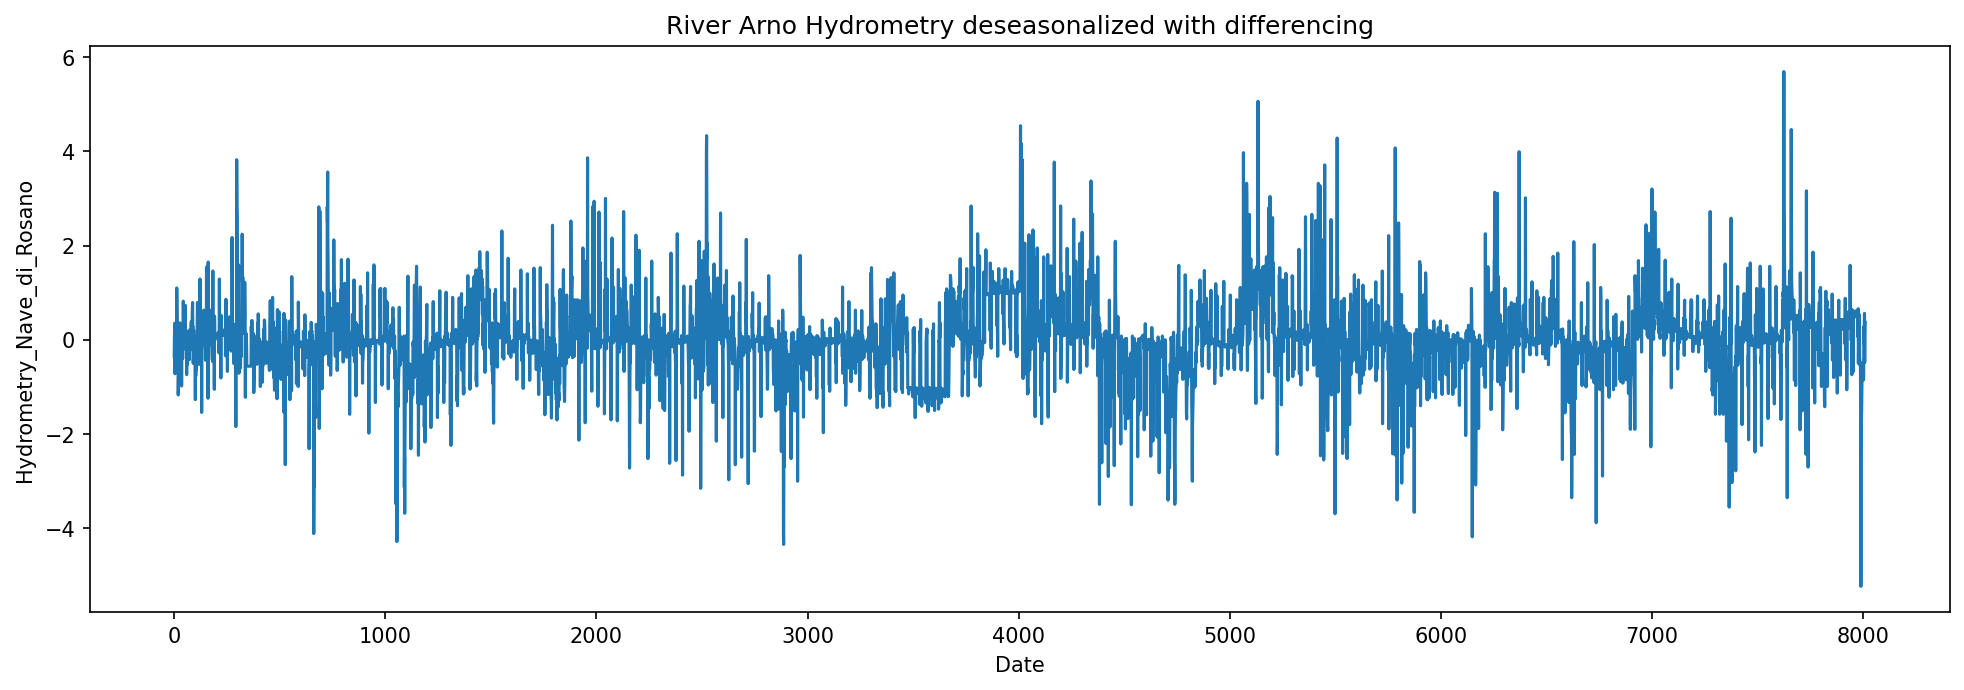

In [170]:
plot_df(y=diff, title = 'River Arno Hydrometry deseasonalized with differencing', xlabel = 'Date', ylabel = 'Hydrometry_Nave_di_Rosano')

# Deseasonalize by dividing the series by the seasonal index


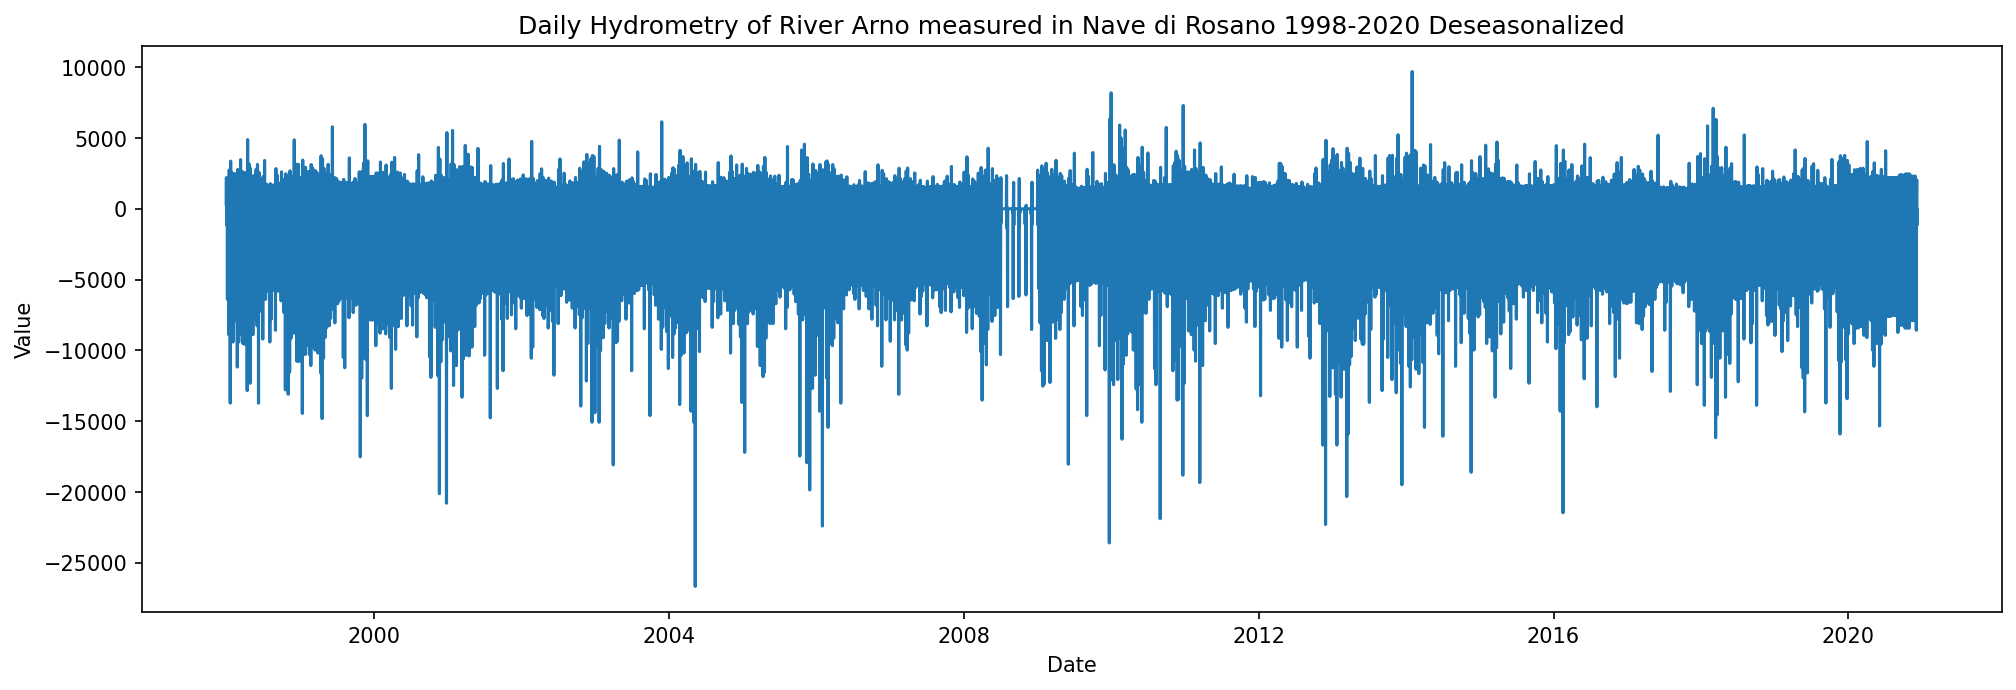

In [171]:
# Additive Decomposition
add_decomp = seasonal_decompose(df_all_filled['Hydrometry_Nave_di_Rosano'], model='additive', extrapolate_trend='freq')


# Deseasonalize
deseasonalize = df_all_filled['Hydrometry_Nave_di_Rosano'] / add_decomp.seasonal

plot_df(x=deseasonalize.index, y=deseasonalize.values, title='Daily Hydrometry of River Arno measured in Nave di Rosano 1998-2020 Deseasonalized')

# Test for seasonality of a time series - Autocorrelation Function (AFC)


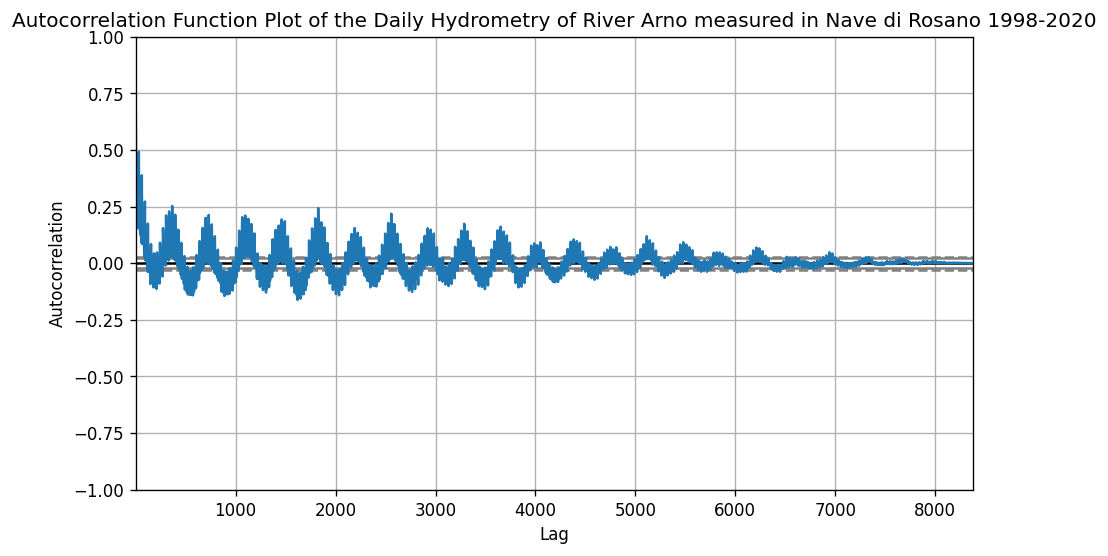

In [172]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
plt.title('Autocorrelation Function Plot of the Daily Hydrometry of River Arno measured in Nave di Rosano 1998-2020')
autocorrelation_plot(df_all_filled.values.tolist())

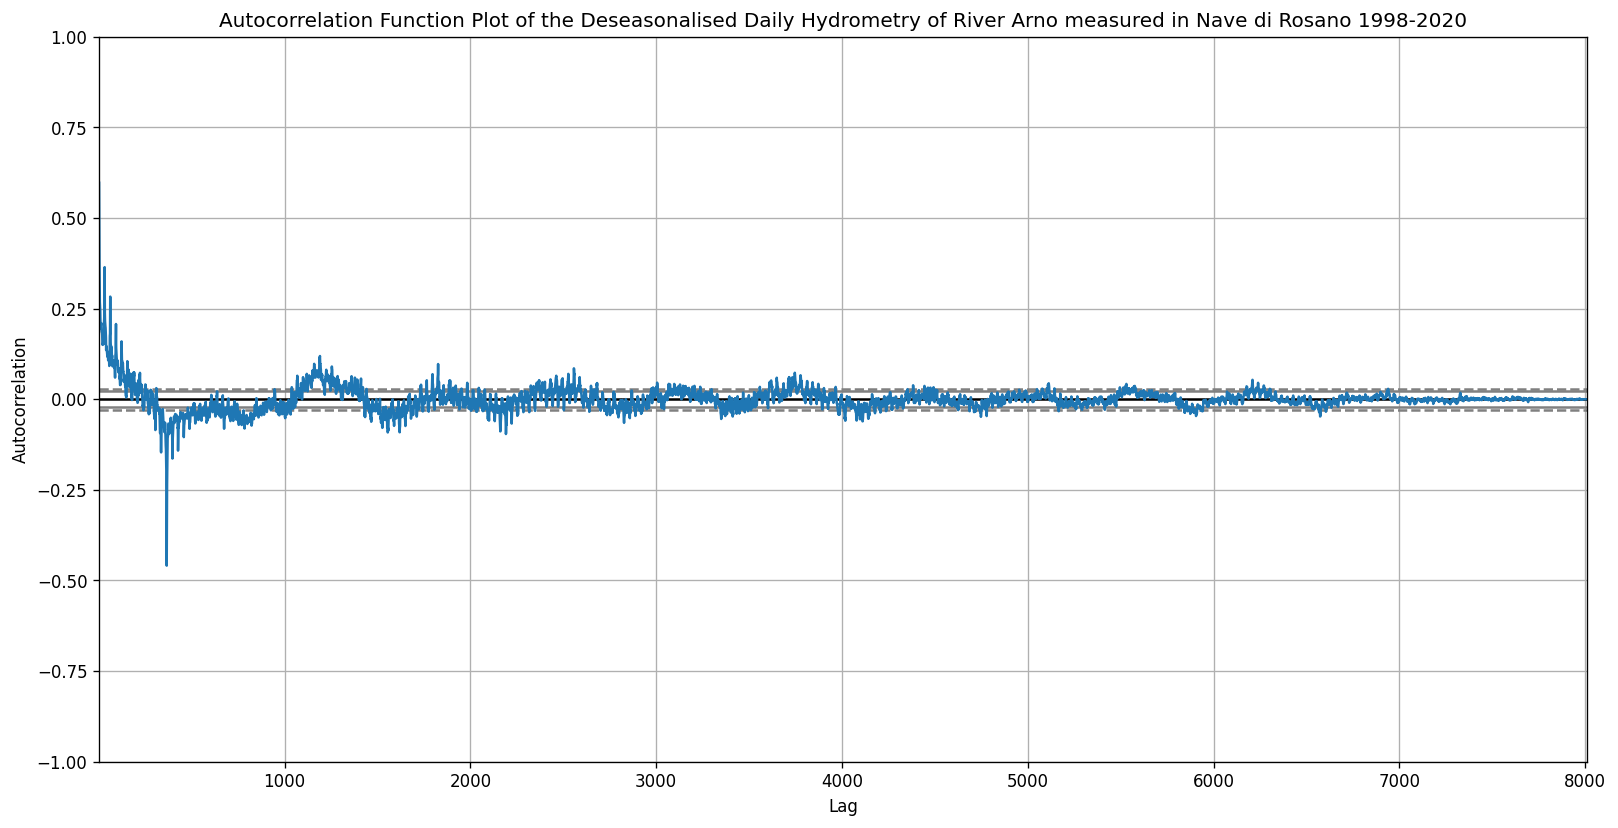

In [173]:
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':120})
plt.title('Autocorrelation Function Plot of the Deseasonalised Daily Hydrometry of River Arno measured in Nave di Rosano 1998-2020')
autocorrelation_plot(diff)


## missing values

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Imput missing values by linear interpolation

In [174]:
df_2020 = df_2020.sort_index()
line_df(df_2020)

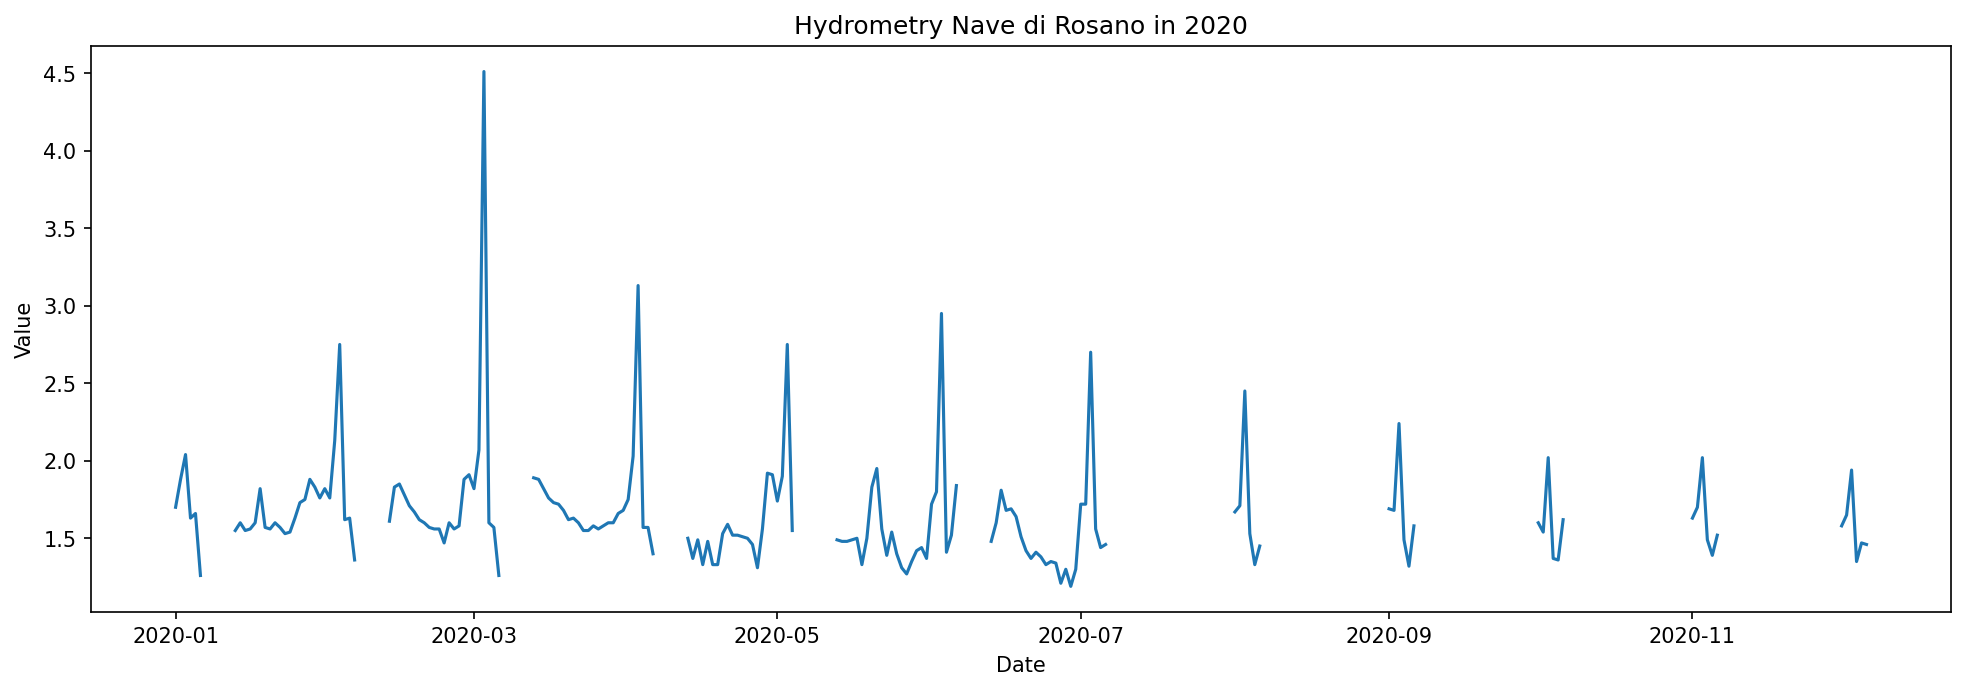

In [175]:
plot_df(df_2020['Hydrometry_Nave_di_Rosano'], 'Hydrometry Nave di Rosano in 2020', x = df_2020.index)

In [176]:
df_hydrometry_with_missing = pd.DataFrame(df_with_missing['Hydrometry_Nave_di_Rosano'])

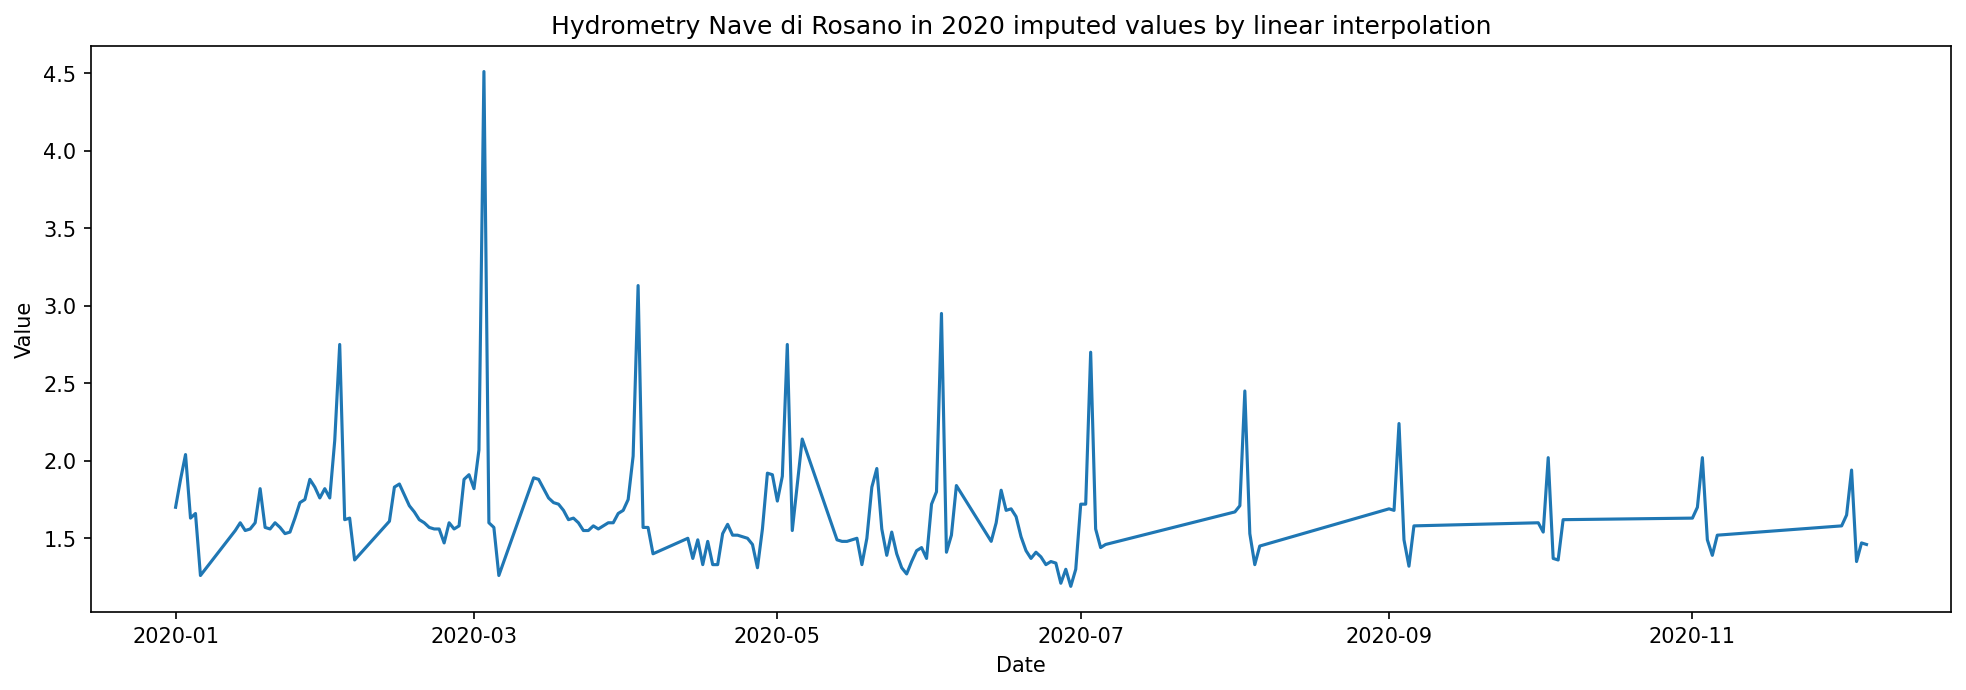

In [177]:
df_interpolated = df_hydrometry_with_missing['Hydrometry_Nave_di_Rosano'].interpolate(method='time')
df_interpolated = df_interpolated.to_frame()
df_interpolated_2020 = df_interpolated.loc[df_interpolated.index.year.isin([2020])]
df_interpolated_2020 = df_interpolated_2020.sort_index()

plot_df(df_interpolated_2020['Hydrometry_Nave_di_Rosano'], 'Hydrometry Nave di Rosano in 2020 imputed values by linear interpolation')

# Imput missing values by cubic interpolation

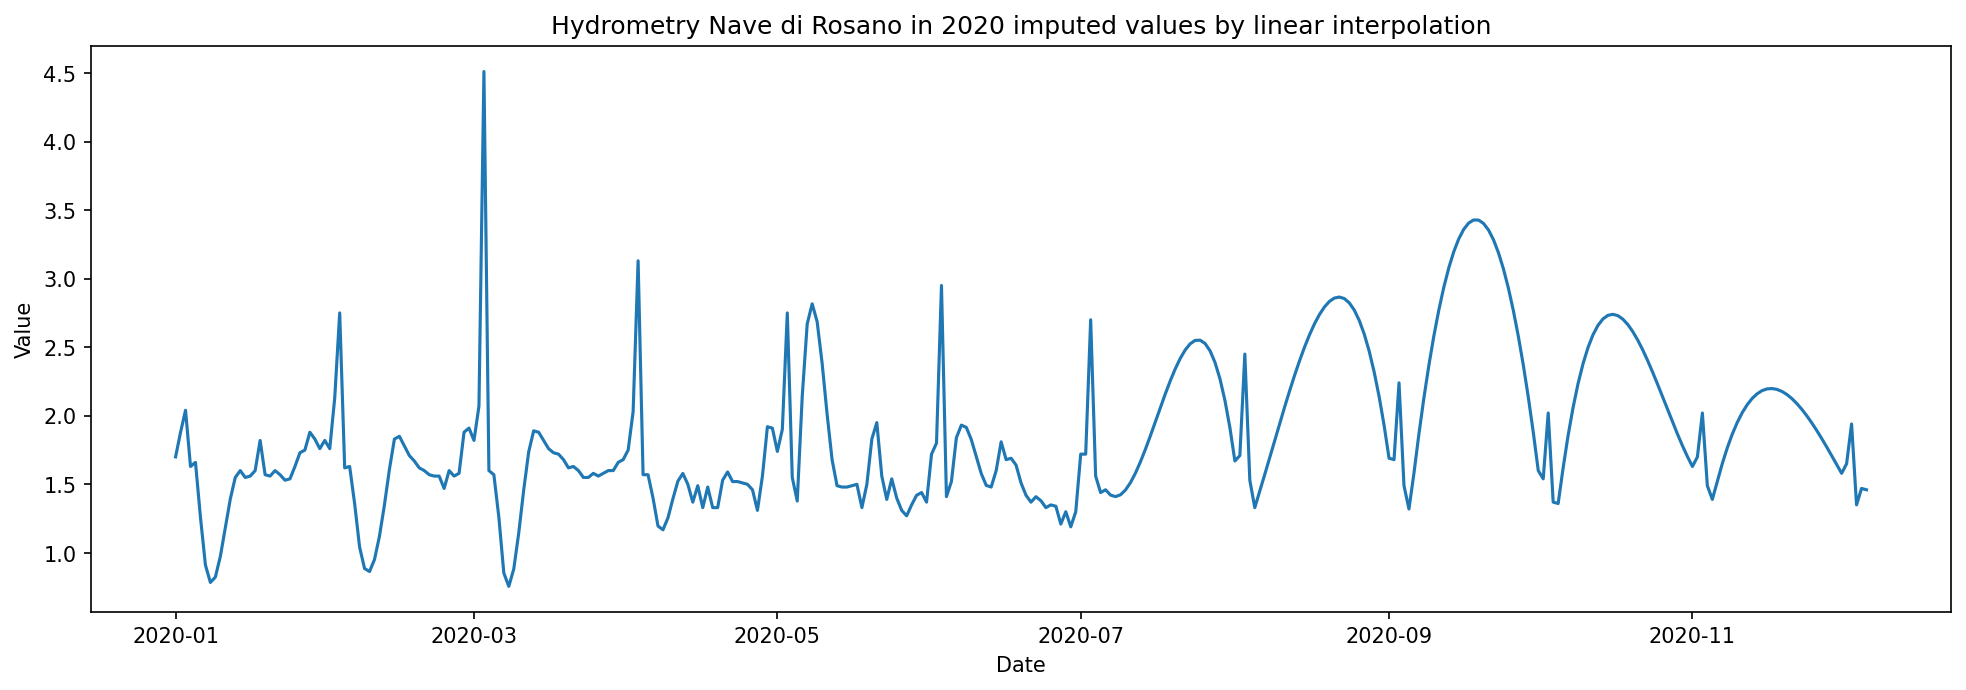

In [178]:
df_cubic_interpolated = df_hydrometry_with_missing['Hydrometry_Nave_di_Rosano'].interpolate(method='cubic')
df_cubic_interpolated = df_cubic_interpolated.to_frame()
df_cubic_interpolated_2020 = df_cubic_interpolated.loc[df_cubic_interpolated.index.year.isin([2020])]
df_cubic_interpolated_2020 = df_cubic_interpolated_2020.sort_index()

plot_df(df_cubic_interpolated_2020['Hydrometry_Nave_di_Rosano'], 'Hydrometry Nave di Rosano in 2020 imputed values by linear interpolation')

# Imput missing values by forward fill

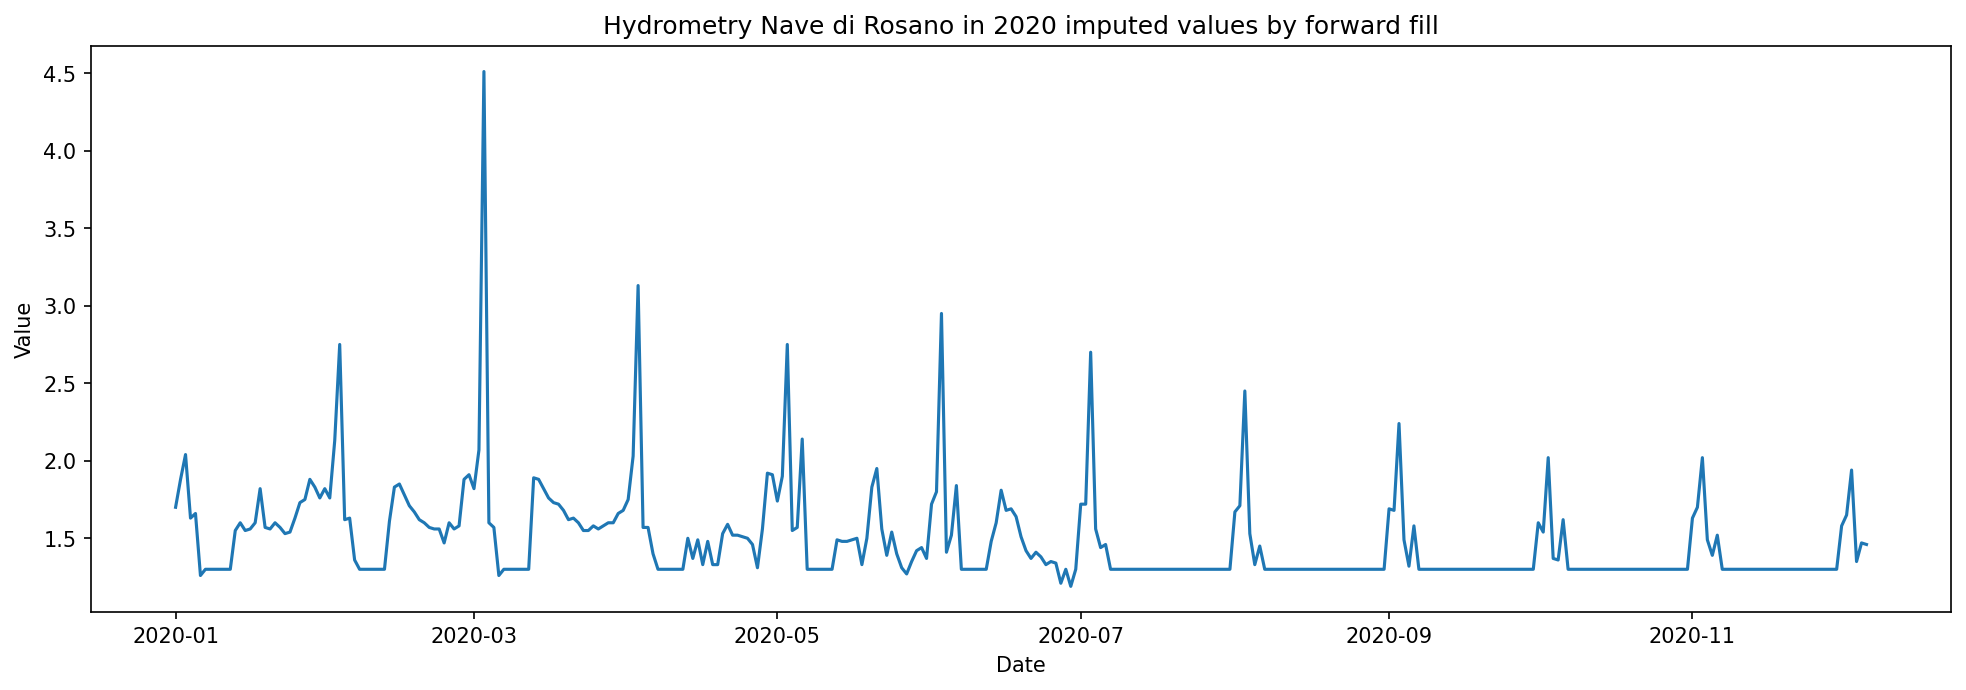

In [179]:
df_hydrometry_ffill = df_hydrometry_with_missing.ffill()
df_hydrometry_ffill_2020 = df_hydrometry_ffill.loc[df_hydrometry_ffill.index.year.isin([2020])]
df_hydrometry_ffill_2020 = df_hydrometry_ffill_2020.sort_index()

plot_df(df_hydrometry_ffill_2020['Hydrometry_Nave_di_Rosano'], 'Hydrometry Nave di Rosano in 2020 imputed values by forward fill')

# Imput missing values by backward fill

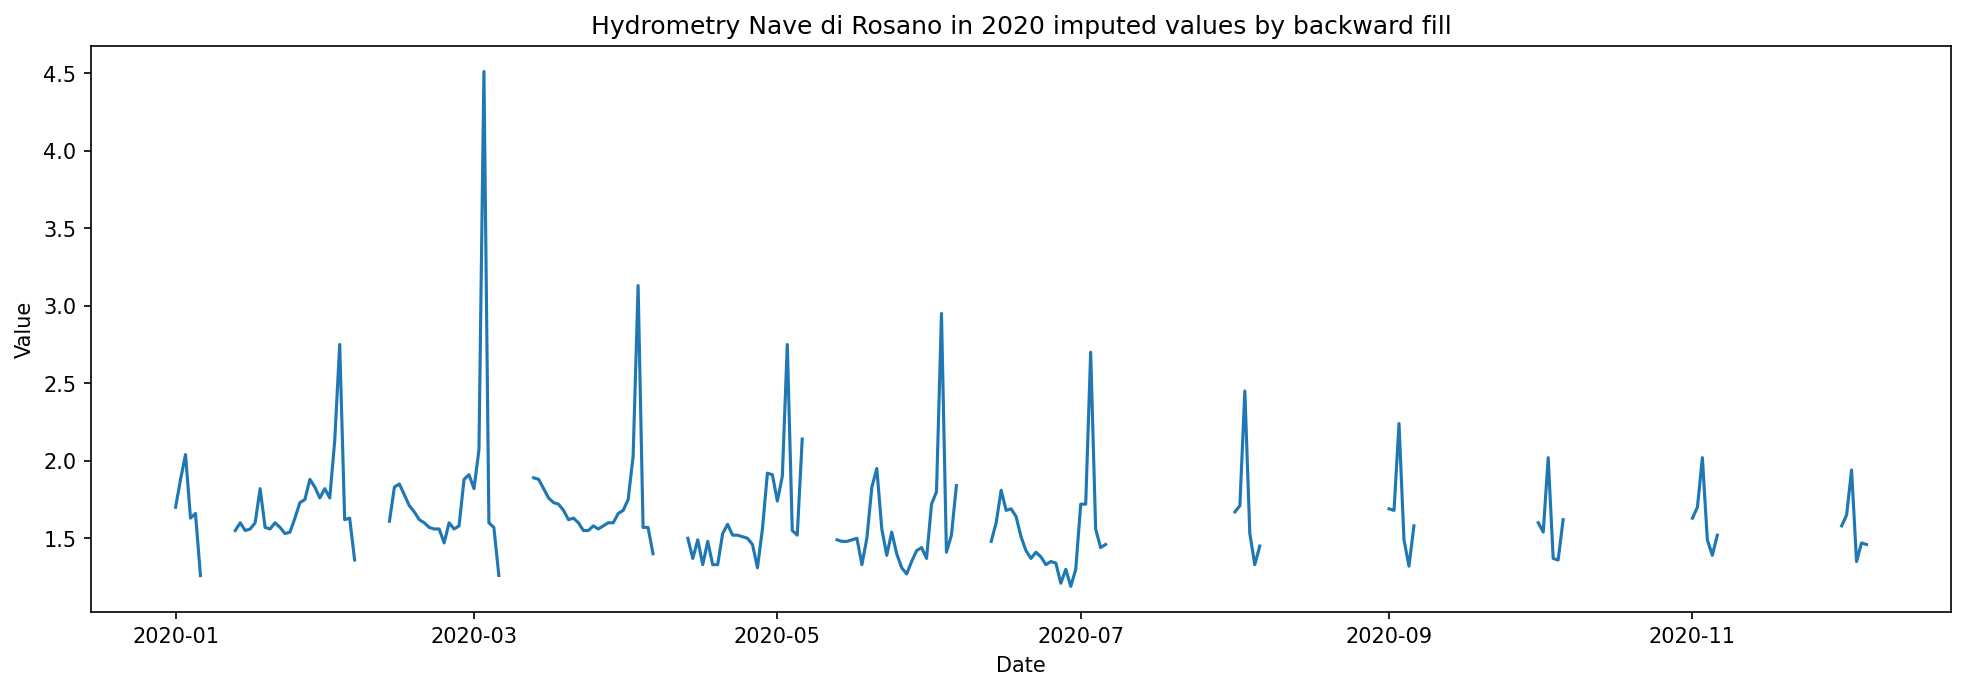

Hydrometry_Nave_di_Rosano    159
dtype: int64

In [180]:
df_hydrometry_bfill = df_hydrometry_with_missing.bfill()
df_hydrometry_bfill_2020 = df_hydrometry_bfill.loc[df_hydrometry_bfill.index.year.isin([2020])]
df_hydrometry_bfill_2020 = df_hydrometry_bfill_2020.sort_index()

plot_df(df_hydrometry_bfill_2020['Hydrometry_Nave_di_Rosano'], 'Hydrometry Nave di Rosano in 2020 imputed values by backward fill')
df_hydrometry_bfill_2020.isnull().sum()

# Imput missing values by seasonal mean



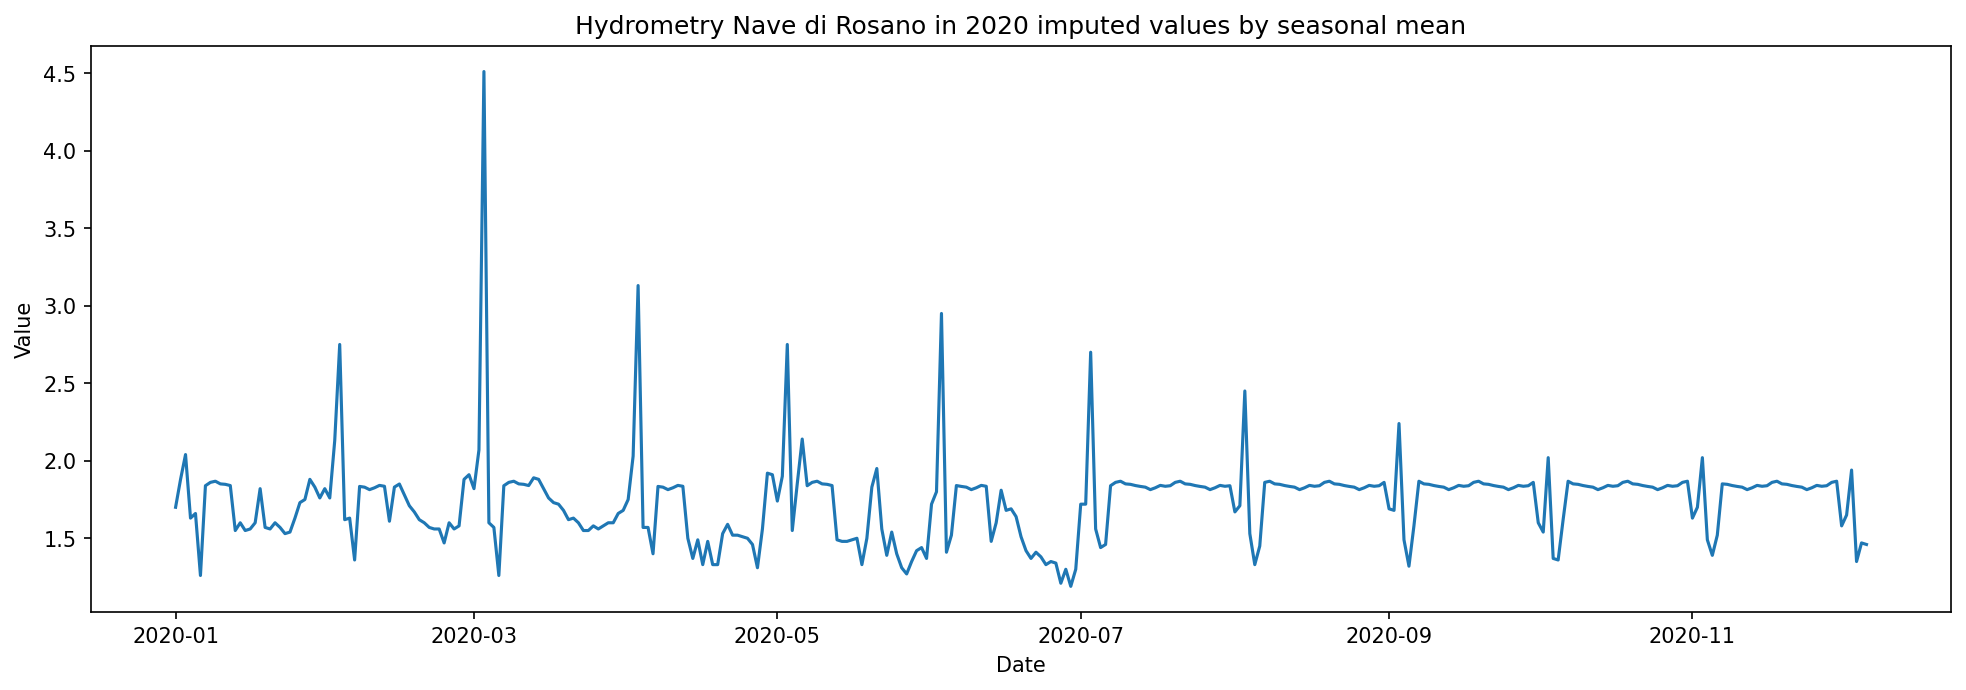

In [181]:
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df_hydrometry_with_missing['seasonal_mean'] = seasonal_mean(df_hydrometry_with_missing['Hydrometry_Nave_di_Rosano'], n=12, lr=1.25)
df_hydrometry_seasonal_mean_2020 = df_hydrometry_with_missing.loc[df_hydrometry_with_missing.index.year.isin([2020])]
df_hydrometry_seasonal_mean_2020 = df_hydrometry_seasonal_mean_2020.sort_index()

plot_df(df_hydrometry_seasonal_mean_2020['seasonal_mean'], 'Hydrometry Nave di Rosano in 2020 imputed values by seasonal mean')

# Imput missing values by mean of 'n' Nearest Past Neighbors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

Mean of empty slice



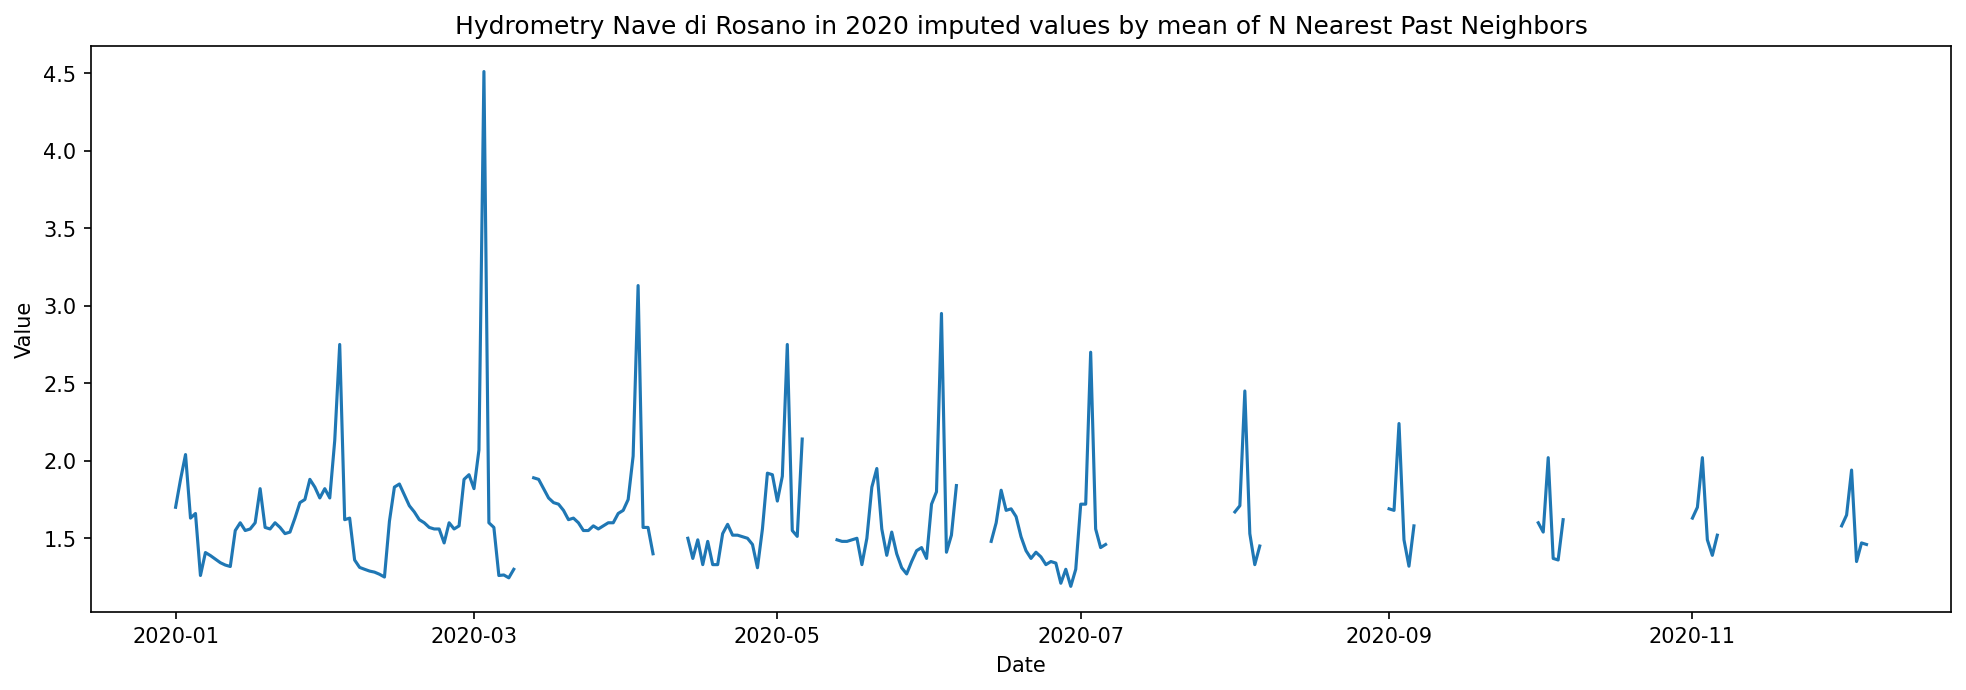

In [182]:
## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df_hydrometry_with_missing['knn_mean'] = knn_mean(df_hydrometry_with_missing['Hydrometry_Nave_di_Rosano'], n=30)
df_hydrometry_knn_mean_2020 = df_hydrometry_with_missing.loc[df_hydrometry_with_missing.index.year.isin([2020])]
df_hydrometry_knn_mean_2020 = df_hydrometry_knn_mean_2020.sort_index()

plot_df(df_hydrometry_knn_mean_2020['knn_mean'], 'Hydrometry Nave di Rosano in 2020 imputed values by mean of N Nearest Past Neighbors')

# Autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



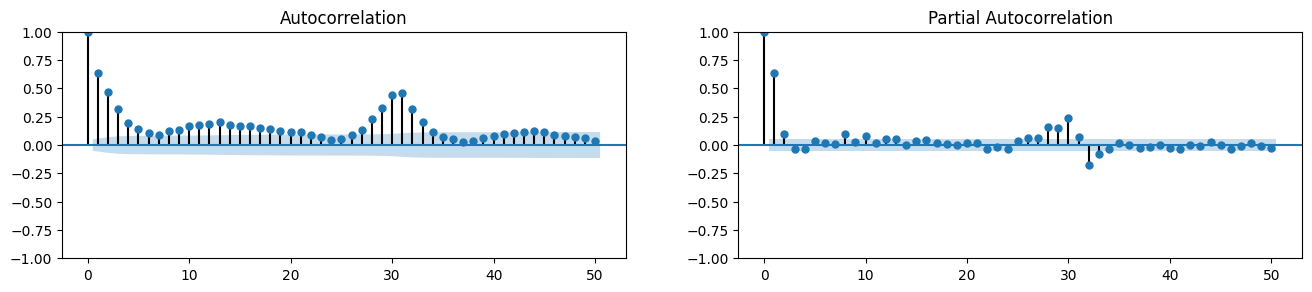

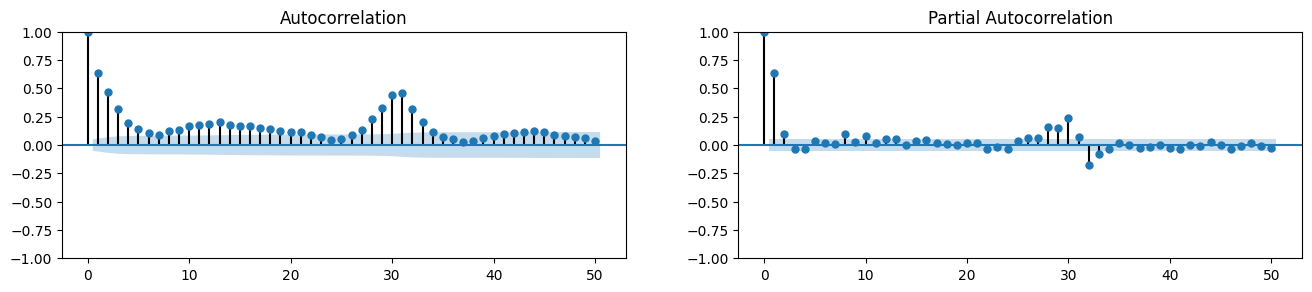

In [184]:
# Draw Plot
df_2015_2018 = df_all.loc[df_all['Year'].isin([2015,2016,2017,2018])]

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_2015_2018['Hydrometry_Nave_di_Rosano'], lags=50, ax=axes[0])
plot_pacf(df_2015_2018['Hydrometry_Nave_di_Rosano'], lags=50, ax=axes[1])

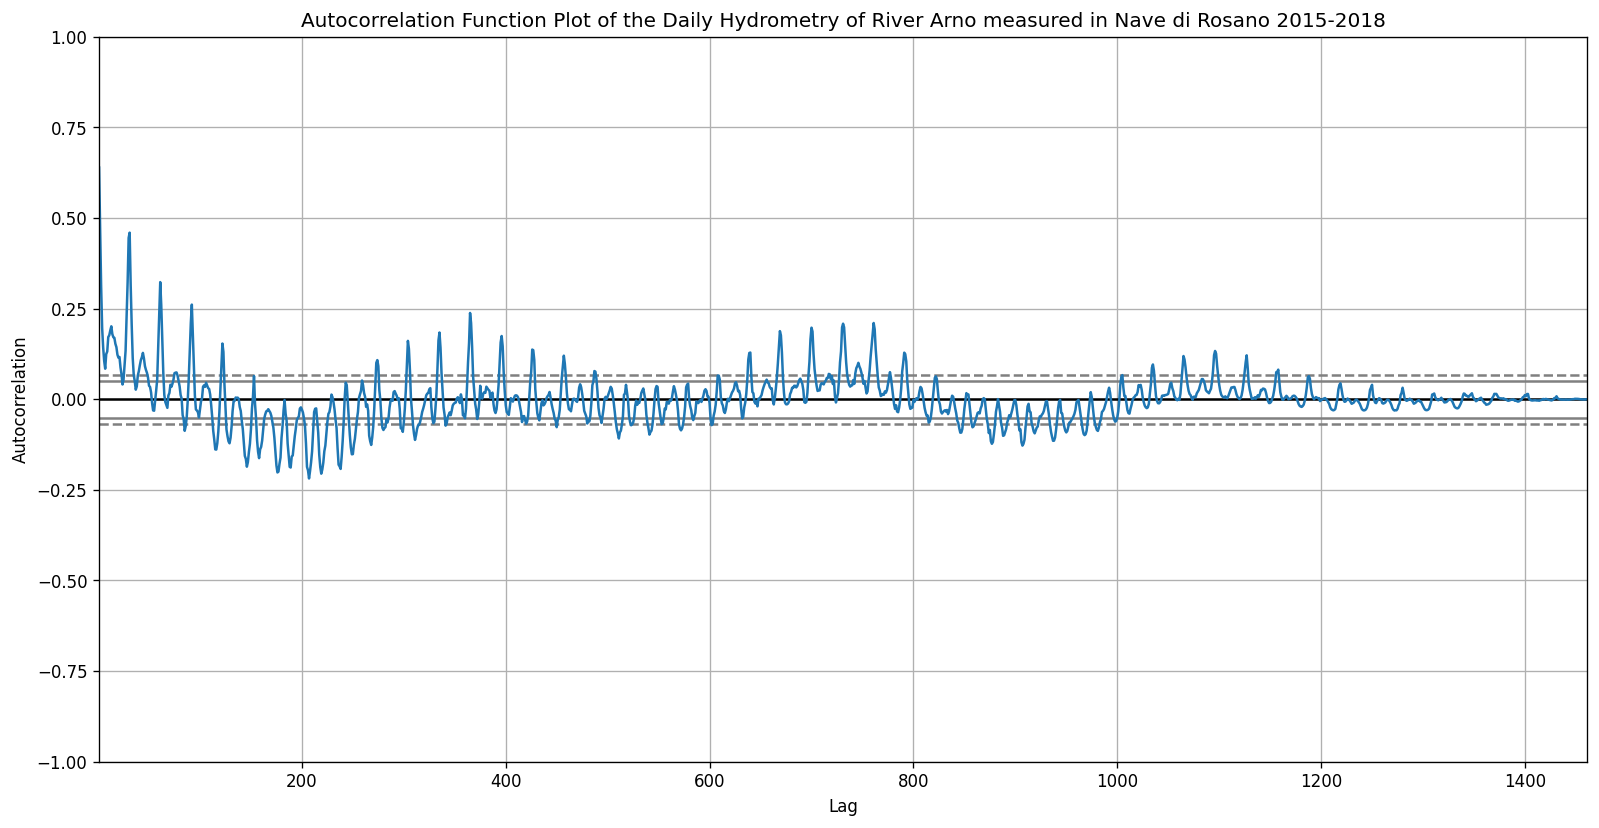

In [185]:
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':120})
plt.title('Autocorrelation Function Plot of the Daily Hydrometry of River Arno measured in Nave di Rosano 2015-2018')
autocorrelation_plot(df_2015_2018['Hydrometry_Nave_di_Rosano'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



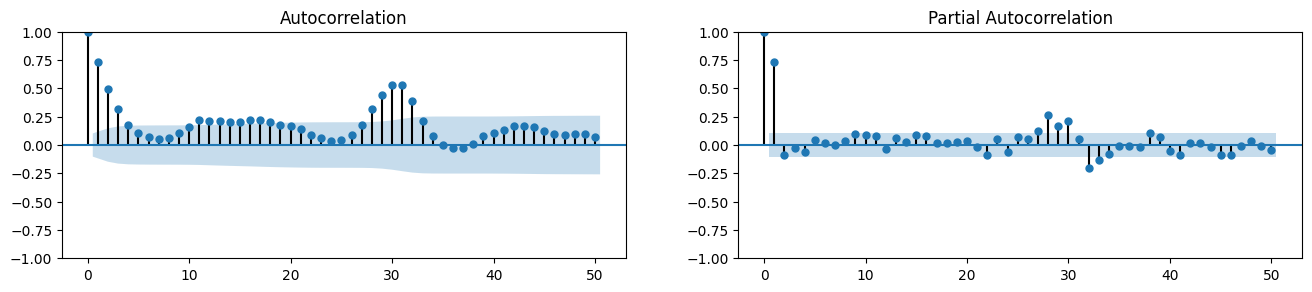

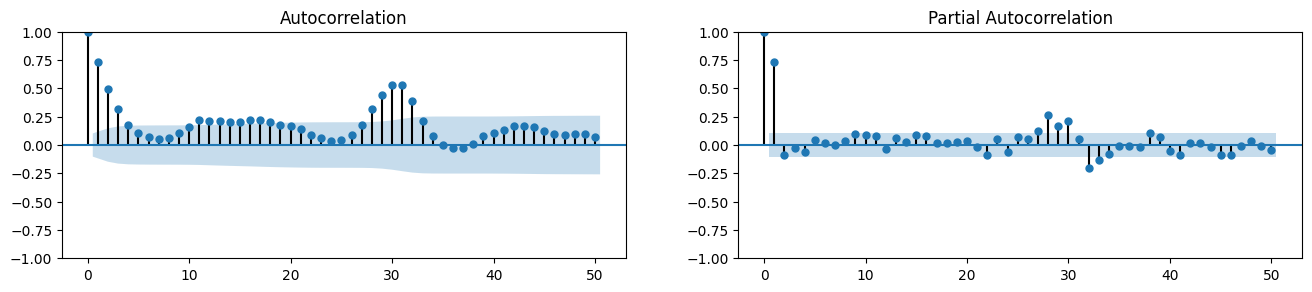

In [186]:
# Draw Plot
df_2018 = df_all.loc[df_all['Year'].isin([2018])]

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_2018['Hydrometry_Nave_di_Rosano'], lags=50, ax=axes[0])
plot_pacf(df_2018['Hydrometry_Nave_di_Rosano'], lags=50, ax=axes[1])

# Lag Plots


lag - fixed amount of passing time

lag - 1. odstęp czasu
      2. opóźnienie

fixed - 1. niezmienny
        2. stały





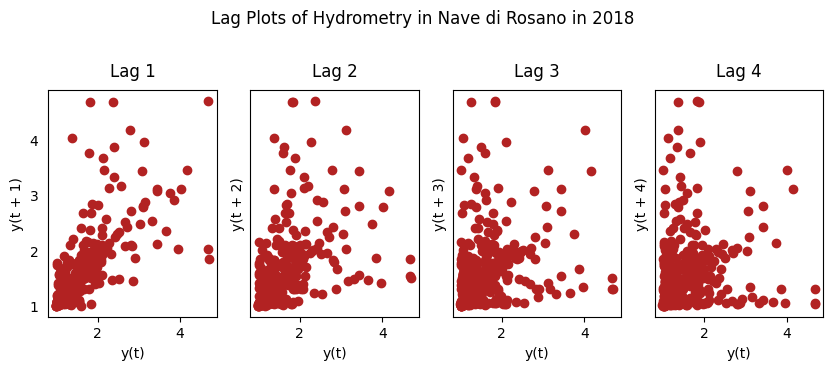

In [202]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
df_2018 = df_2018.sort_index()

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_2018['Hydrometry_Nave_di_Rosano'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))


fig.suptitle('Lag Plots of Hydrometry in Nave di Rosano in 2018', y=1.15)    
fig.show()

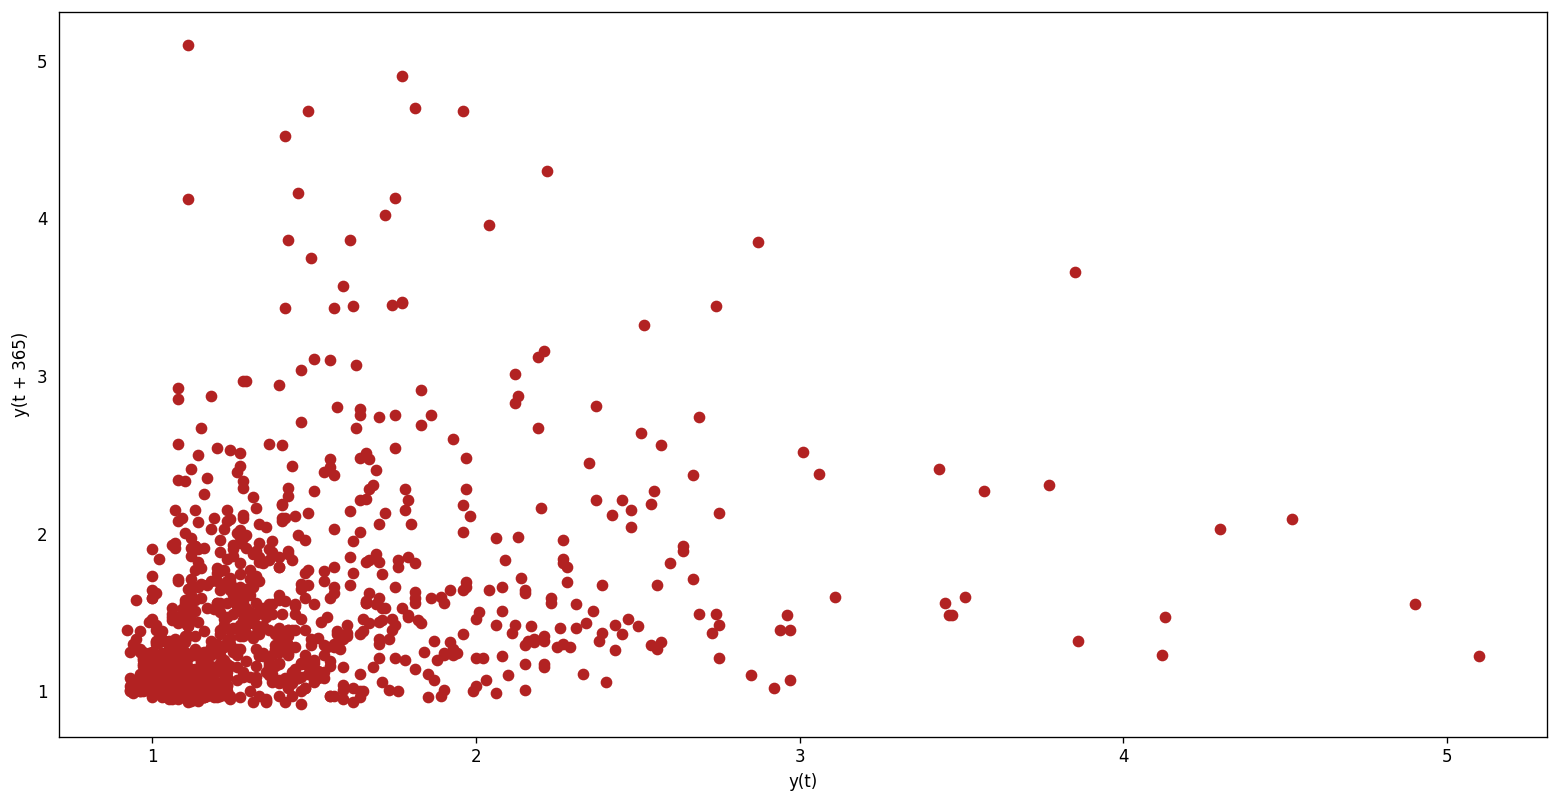

In [201]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
df_2015_2018=df_2015_2018.sort_index()

lag_plot(df_2015_2018['Hydrometry_Nave_di_Rosano'], lag=365, c='firebrick')  
fig.show()

# Approximate Entropy
# https://en.wikipedia.org/wiki/Approximate_entropy


In [203]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df_2018['Hydrometry_Nave_di_Rosano'], m=2, r=0.2*np.std(df_2018['Hydrometry_Nave_di_Rosano'])))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.760521798127233
0.23183235978205552
0.6547329434228875


# Sample Entropy

# https://en.wikipedia.org/wiki/Sample_entropy


In [204]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df_2018['Hydrometry_Nave_di_Rosano'], m=2, r=0.2*np.std(df_2018['Hydrometry_Nave_di_Rosano'])))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.4367682576192127
inf
3.0910424533583156


# Smoothening of a time series

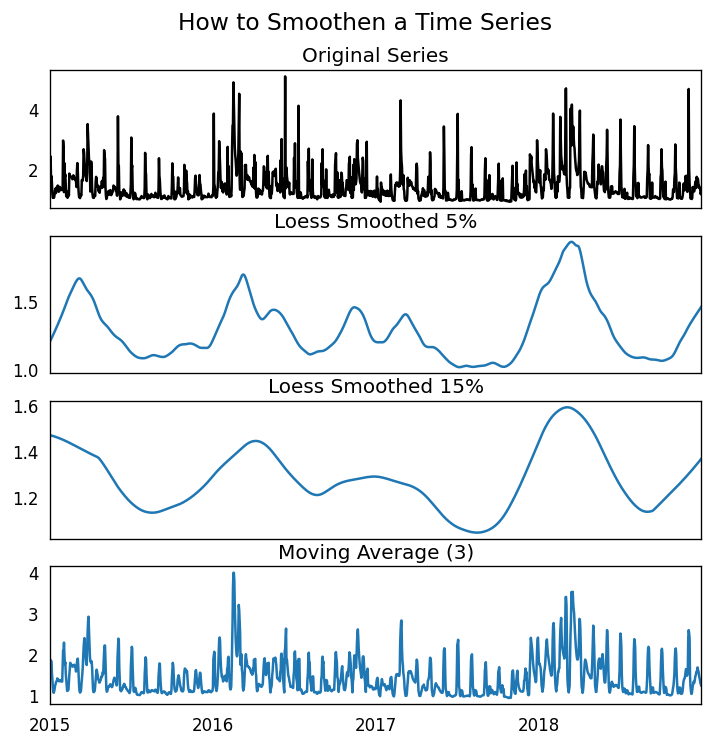

In [205]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = df_2015_2018['Hydrometry_Nave_di_Rosano'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_2015_2018['Hydrometry_Nave_di_Rosano'], np.arange(len(df_2015_2018['Hydrometry_Nave_di_Rosano'])), frac=0.05)[:, 1], index=df_2015_2018.index, columns=['Hydrometry_Nave_di_Rosano'])
df_loess_15 = pd.DataFrame(lowess(df_2015_2018['Hydrometry_Nave_di_Rosano'], np.arange(len(df_2015_2018['Hydrometry_Nave_di_Rosano'])), frac=0.15)[:, 1], index=df_2015_2018.index, columns=['Hydrometry_Nave_di_Rosano'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_2015_2018['Hydrometry_Nave_di_Rosano'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Hydrometry_Nave_di_Rosano'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Hydrometry_Nave_di_Rosano'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

# Granger Casuality test

In [206]:
grangercausalitytests(df_2015_2018[['Hydrometry_Nave_di_Rosano', 'Month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.7474 , p=0.0000  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=17.7840 , p=0.0000  , df=1
likelihood ratio test: chi2=17.6765 , p=0.0000  , df=1
parameter F test:         F=17.7474 , p=0.0000  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.4715 , p=0.0000  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=25.0288 , p=0.0000  , df=2
likelihood ratio test: chi2=24.8166 , p=0.0000  , df=2
parameter F test:         F=12.4715 , p=0.0000  , df_denom=1454, df_num=2


{1: ({'lrtest': (17.67654464698535, 2.618354752161635e-05, 1),
   'params_ftest': (17.747442303429885, 2.6773351043954985e-05, 1457.0, 1.0),
   'ssr_chi2test': (17.783984737822166, 2.474574456508633e-05, 1),
   'ssr_ftest': (17.74744230342938, 2.6773351043961836e-05, 1457.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (24.81656258489602, 4.0846223069411045e-06, 2),
   'params_ftest': (12.471523284321268, 4.262059546360514e-06, 1454.0, 2.0),
   'ssr_chi2test': (25.02882045643105, 3.6733363259701665e-06, 2),
   'ssr_ftest': (12.471523284321707, 4.262059546358758e-06, 1454.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(df_2015_2018[['Hydrometry_Nave_di_Rosano', 'Year']], maxlag=2)

In [ ]:
grangercausalitytests(df_2015_2018[['Hydrometry_Nave_di_Rosano', 'Rainfall_Le_Croci']], maxlag=2)

The P-Values are Zero for Month in opposite to Year and Day. So the Month indeed can be used to forecast

In [ ]:
 
!git push -u origin master